<a href="https://colab.research.google.com/github/kanishka2985/CardioVascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction Project



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Name**            - Kanishka Sharma


# **Project Summary -**



Cardiovascular diseases (CVDs) are among the leading causes of death worldwide, claiming millions of lives every year. Early detection and timely medical intervention play a critical role in reducing mortality and improving the quality of life for patients. However, traditional methods of identifying individuals at risk often involve time‑consuming processes, invasive procedures, or are performed too late in the disease’s progression. With the increasing availability of patient health data, machine learning offers an effective and efficient way to predict the risk of cardiovascular disease at an early stage. This project focuses on building and evaluating different machine learning models to accurately predict heart disease risk based on various patient attributes.

The dataset used in this project contains clinical, demographic, and lifestyle information of patients. Key features include parameters like age, gender, cholesterol levels, resting blood pressure, maximum heart rate, blood sugar levels, and other relevant medical indicators. Before modeling, data preprocessing steps such as handling missing values, encoding categorical variables, and scaling numerical features were performed. Exploratory data analysis helped in understanding data patterns, detecting outliers, and visualizing relationships between variables and the target outcome. These steps were crucial to ensure that the data fed into the models was clean, consistent, and meaningful.

Several machine learning models were implemented and tested to find the most effective predictor. The models included Logistic Regression, Decision Tree, Random Forest, and XGBoost, both with their default parameters and after hyperparameter tuning. Each model was trained on the dataset and evaluated on unseen test data. To measure their performance, we considered four key metrics: precision, recall, F1 score, and ROC‑AUC. Precision reflects how many predicted positives are actually correct, while recall measures how many actual positives were detected by the model. The F1 score provides a balance between precision and recall, and the ROC‑AUC shows the model’s ability to distinguish between positive and negative classes across all thresholds.

After evaluating all the models, XGBoost with default parameters emerged as the best performing model. It achieved a high F1 score, demonstrating a good balance between catching true heart‑risk patients and avoiding false alarms. Its high recall ensured that most high‑risk patients were correctly identified, while its strong precision minimized unnecessary follow‑up tests. The ROC‑AUC score further confirmed its strong ability to separate high‑risk and low‑risk individuals. Although a tuned version of XGBoost was also tested, it showed a slight improvement in precision but a drop in recall, which could lead to more missed high‑risk patients. In a healthcare setting, missing a true positive is more critical than handling a few false positives, so the default XGBoost model was chosen.

The results from this project highlight the potential of machine learning in supporting clinical decision‑making. By identifying high‑risk patients early, medical professionals can prioritize those in need of further diagnostic testing or preventive care. This not only improves patient outcomes but also optimizes the use of healthcare resources by reducing unnecessary procedures. The chosen model can be further enhanced by integrating additional patient data, regularly retraining with new information, and collaborating with medical experts to fine‑tune its predictions.

In conclusion, this project successfully demonstrates how data‑driven techniques can be applied to a critical healthcare problem. Through careful data preparation, model selection, and performance evaluation, we developed an XGBoost model that can effectively predict cardiovascular disease risk. This approach provides a valuable tool for early intervention, offering both clinical and economic benefits. Future work may involve deploying the model in real‑time hospital systems, testing it on larger datasets, and exploring explainability techniques to help clinicians understand the reasoning behind each prediction. Ultimately, projects like this mark a step forward in combining technology with medicine to save lives and improve care.


# **GitHub Link For The Project -**

https://github.com/kanishka2985/CardioVascular-Risk-Prediction

# Links-

Github Link:- https://github.com/kanishka2985

LinkedIn Link:- www.linkedin.com/in/kanishka2985

# **Problem Statement**


Cardiovascular diseases (CVDs) are the leading cause of mortality worldwide, accounting for millions of deaths each year. Early detection and accurate prediction of CVD risk are crucial for timely intervention, improved patient outcomes, and reduced healthcare costs. However, traditional diagnostic methods often rely on invasive procedures or are applied too late in the disease progression.

Given a dataset of patient health records—including clinical, demographic, and lifestyle variables—the goal is to develop and evaluate machine learning models that can predict whether a patient is at risk of developing cardiovascular disease.

The challenge is to identify patterns and relationships within the data that allow for high predictive performance while maintaining interpretability for clinical use.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from datetime import datetime

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

import lightgbm as lgb
import xgboost as xgb
from xgboost import XGBClassifier

### Dataset Loading

In [2]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
path='/content/drive/MyDrive/Colab Notebooks/cardiovascular risk prediction dataset/Copy of data_cardiovascular_risk.csv'
df=pd.read_csv(path)

### Dataset First View

In [4]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(3390, 17)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

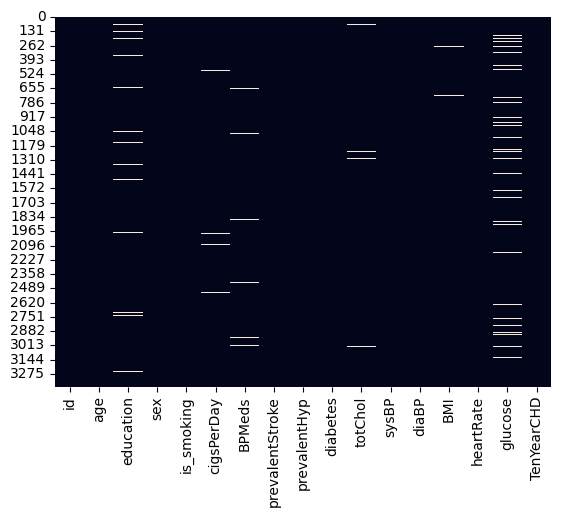

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(),cbar=False)

### What did you know about your dataset?

Through the dataset we can see that:-
1. The Cardiovascular Dataset has **3390** rows and **17** columns in it.
2.  **No data is being repeated** in the dataset which makes it quite clean
3. But the dataset **contain null values** ,with `glucose` having the highest NaN values in it:-
* `education`- 87 NaN values
* `cigsPerDay`- 22 NaN values
* `BPMeds`-	44 NaN values
* `totChol`-	38 NaN values
* `BMI`-	14 NaN values
* `glucose`-	304 NaN values
* `heartRate`- 1 NaN value
* Therefore, handling of these NaN values should be done before modeling.
4. The columns contain **3 different datatypes** (i.e.,float64,object,int64):
* **Nine Float Columns** (i.e., `education`,`cigsPerDay`,`BPMeds`,`totChol`,           `sysBP`,`diaBP`,`BMI`,`heartRate`,`glucose`)
* **Six Int Columns** (i.e.,`id`,'`age`,`prevalentStroke`,`prevalentHyp`,`diabetes`,`TenYearCHD`)
* **Two Object Columns** (i.e., `sex`,`is_smoking`)


## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe().T

count         mean         std     min     25%      50%  \
id               3390.0  1694.500000  978.753033    0.00  847.25  1694.50   
age              3390.0    49.542183    8.592878   32.00   42.00    49.00   
education        3303.0     1.970936    1.019081    1.00    1.00     2.00   
cigsPerDay       3368.0     9.069477   11.879078    0.00    0.00     0.00   
BPMeds           3346.0     0.029886    0.170299    0.00    0.00     0.00   
prevalentStroke  3390.0     0.006490    0.080309    0.00    0.00     0.00   
prevalentHyp     3390.0     0.315339    0.464719    0.00    0.00     0.00   
diabetes         3390.0     0.025664    0.158153    0.00    0.00     0.00   
totChol          3352.0   237.074284   45.247430  107.00  206.00   234.00   
sysBP            3390.0   132.601180   22.292030   83.50  117.00   128.50   
diaBP            3390.0    82.883038   12.023581   48.00   74.50    82.00   
BMI              3376.0    25.794964    4.115449   15.96   23.02    25.38   
heartRate        3389.0    75.977279   11.971868   45.00   68.00    75.00   
glucose          3086.0    82.086520   24.244753   40.00   71.00    78.00   
TenYearCHD       3390.0     0.150737    0.357846    0.00    0.00     0.00   

                     75%     max  
id               2541.75  3389.0  
age                56.00    70.0  
education           3.00     4.0  
cigsPerDay         20.00    70.0  
BPMeds              0.00     1.0  
prevalentStroke     0.00     1.0  
prevalentHyp        1.00     1.0  
diabetes            0.00     1.0  
totChol           264.00   696.0  
sysBP             144.00   295.0  
diaBP              90.00   142.5  
BMI                28.04    56.8  
heartRate          83.00   143.0  
glucose            87.00   394.0  
TenYearCHD          0.00     1.0

### Variables Description

| **Variable**      | **Description**                                                                   |
| ----------------- | --------------------------------------------------------------------------------- |
| `id`              | Unique identifier for each individual (can be dropped for modeling)               |
| `age`             | Age of the person (in years)                                                      |
| `education`       | Education level (1 = lowest, 4 = highest)                                         |
| `sex`             | Biological sex (F = Female, M = Male)                                             |
| `is_smoking`      | Whether the person is currently a smoker (YES or NO)                              |
| `cigsPerDay`      | Number of cigarettes smoked per day (0 if non-smoker)                             |
| `BPMeds`          | Is the person on blood pressure medication? (1 = Yes, 0 = No)                     |
| `prevalentStroke` | Has the person ever had a stroke? (1 = Yes, 0 = No)                               |
| `prevalentHyp`    | Has the person ever had hypertension? (1 = Yes, 0 = No)                           |
| `diabetes`        | Whether the person has diabetes (1 = Yes, 0 = No)                                 |
| `totChol`         | Total cholesterol level (mg/dL)                                                   |
| `sysBP`           | Systolic blood pressure (mmHg)                                                    |
| `diaBP`           | Diastolic blood pressure (mmHg)                                                   |
| `BMI`             | Body Mass Index = weight / (height²), indicator of body fat                       |
| `heartRate`       | Heart rate in beats per minute (BPM)                                              |
| `glucose`         | Glucose level in mg/dL                                                            |
| `TenYearCHD`      | Target variable: Risk of coronary heart disease within 10 years (1 = Yes, 0 = No) |



### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  id is 3390 .
No. of unique values in  age is 39 .
No. of unique values in  education is 4 .
No. of unique values in  sex is 2 .
No. of unique values in  is_smoking is 2 .
No. of unique values in  cigsPerDay is 32 .
No. of unique values in  BPMeds is 2 .
No. of unique values in  prevalentStroke is 2 .
No. of unique values in  prevalentHyp is 2 .
No. of unique values in  diabetes is 2 .
No. of unique values in  totChol is 240 .
No. of unique values in  sysBP is 226 .
No. of unique values in  diaBP is 142 .
No. of unique values in  BMI is 1259 .
No. of unique values in  heartRate is 68 .
No. of unique values in  glucose is 132 .
No. of unique values in  TenYearCHD is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
df = df.copy()
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [14]:
#maximum age value
df['age'].max()

70

In [15]:
#minimum age value
df['age'].min()

32

In [16]:
#Handling the null values

# Impute categorical columns with mode
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)

#Drop only rows where heartRate is missing
df = df.dropna(subset=['heartRate'])

# Impute numerical columns with median
num_cols = ['cigsPerDay', 'totChol', 'BMI','glucose']
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [17]:
#Creating a new feature 'pulse_pressure' by subtracting diastolic BP from systolic BP
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

In [18]:
# dded a column is_obese, where people with a BMI of 30 or more are marked as 1 (obese) and others as 0 (not obese).
df['is_obese'] = (df['BMI'] >= 30).astype(int)

In [19]:
# Add a column 'high_cholesterol': 1 if total cholesterol > 240, else 0
df['high_cholesterol'] = (df['totChol'] > 240).astype(int)

In [20]:
# Add 'glucose_status': normal, pre-diabetes, or diabetes based on glucose level
df['glucose_status'] = df['glucose'].apply(lambda x: 'normal' if x < 100 else ('pre-diabetes' if x < 126 else 'diabetes'))

In [21]:
# Add 'smoking_intensity' based on number of cigarettes per day
# Non-smoker for 0 cigarettes,Light smoker for 1–10,Moderate smoker for 11–20,Heavy smoker for more than 20.
df['smoking_intensity'] = pd.cut(df['cigsPerDay'], bins=[-1, 0, 10, 20, 60], labels=['non-smoker', 'light', 'moderate', 'heavy'])

In [22]:
df.head().T

0           1       2         3       4
id                      0           1       2         3       4
age                    64          36      46        50      64
education             2.0         4.0     1.0       1.0     1.0
sex                     F           M       F         M       F
is_smoking            YES          NO     YES       YES     YES
cigsPerDay            3.0         0.0    10.0      20.0    30.0
BPMeds                0.0         0.0     0.0       0.0     0.0
prevalentStroke         0           0       0         0       0
prevalentHyp            0           1       0         1       0
diabetes                0           0       0         0       0
totChol             221.0       212.0   250.0     233.0   241.0
sysBP               148.0       168.0   116.0     158.0   136.5
diaBP                85.0        98.0    71.0      88.0    85.0
BMI                 25.38       29.77   20.35     28.26   26.42
heartRate            90.0        72.0    88.0      68.0    70.0
glucose              80.0        75.0    94.0      94.0    77.0
TenYearCHD              1           0       0         1       0
pulse_pressure       63.0        70.0    45.0      70.0    51.5
is_obese                0           0       0         0       0
high_cholesterol        0           0       1         0       1
glucose_status     normal      normal  normal    normal  normal
smoking_intensity   light  non-smoker   light  moderate   heavy

In [23]:
# Handling Outliers & Outlier treatments
columns=['age', 'education', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure',
        'is_obese', 'smoking_intensity','high_cholesterol','glucose_status','smoking_intensity','sex']
# let's create a function to check the outliers
def check_outliers(columns,data):

  # use plotly for better plot
  for i in columns:
    fig = px.box(data,y=i)
    fig.update_layout(height=500, width=600)
    fig.show()
# Plot the graph
check_outliers(columns,df)

In [24]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure',
       'is_obese', 'high_cholesterol', 'glucose_status', 'smoking_intensity'],
      dtype='object')

In [25]:
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
pulse_pressure       0
is_obese             0
high_cholesterol     0
glucose_status       0
smoking_intensity    1
dtype: int64

In [26]:
# Remove row where 'smoking_intensity' is missing (NaN)
df = df.dropna(subset=['smoking_intensity'])

### What all manipulations have you done and insights you found?

Here’s what I did with the data and what I found.:-
1. In the cardiovascular dataset, the age of individuals ranged from 32 to 70 years.
2. For **handling the null values**:-
* **categorical columns** like education and BP medication, we filled missing values using the mode (the most frequent value).
* **numerical columns** like cholesterol, BMI, glucose, and cigarettes per day, we filled missing values using the median.
* Only **one row** had a missing heart rate, and since it's a crucial health indicator, we **dropped** that row from the dataset.
3. A new column `pulse_pressure` was created by subtracting diastolic blood pressure (`diaBP`) from systolic blood pressure (`sysBP`). This helps understand the pressure difference during heartbeats.
4. We added a column `is_obese`, where people with a BMI of 30 or more are marked as 1 (**obese**) and others as 0 (**not obese**).
5. A column `high_cholesterol` was created. If someone’s total cholesterol is over 240, they are marked as 1 (**high**), else 0.
6. Created a new column `glucose_status` to classify individuals based on their glucose levels:

* **Normal** if glucose is below 100,

* **Pre-diabetes** if between 100 and 125,

* **Diabetes** if 126 or more.
7. created a new column `smoking_intensity` to categorize individuals based on daily cigarette use:

* **Non-smoker** for 0 cigarettes,

* **Light smoker** for 1–10,

* **Moderate smoker** for 11–20,

* **Heavy smoker** for more than 20.
8. `smoking_intensity` column had 1 NaN value,which can be dropped.
9. After checking for outliers using boxplots, we found that `totChol`, `sysBP`, `diaBP`, `BMI`, `heartRate`, `glucose`, and `pulse_pressure` have the most outliers in the dataset,which needs to be removed for our modeling.






## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: 10-Year CHD Risk by Age

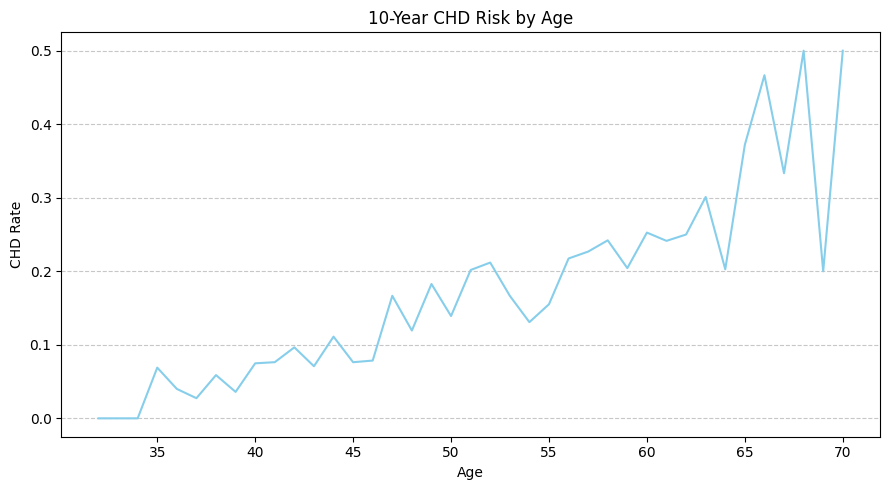

In [27]:
# 10-Year CHD Risk by Age
chd_by_age = df.groupby('age')['TenYearCHD'].mean()

# Plot
plt.figure(figsize=(9, 5))
chd_by_age.plot(kind='line', color='skyblue')
plt.title('10-Year CHD Risk by Age')
plt.xlabel('Age')
plt.ylabel('CHD Rate')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For this line graph is being used:-
* To show how the risk of developing Coronary Heart Disease (CHD) over 10 years changes with age.
* A line chart is great for spotting trends over time or age, making it easy to see if risk increases, decreases, or stays the same as people get older.



##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph:-
* The chart clearly shows that the risk of CHD increases with age.

* People in their 60s have a much higher risk, especially around ages 67–68.

* After age 68 approx, there’s a sharp drop, which might be due to fewer people in that age group (less data).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

  <u>**Positive Business Impact:**</u>

Yes, this chart can help the business grow in a good way.

* **Focus on the Right Age Group**: It shows that people over **50**, especially between **60 and 70**, have a higher chance of heart disease. So, health companies can focus more on helping them.

* **Offer Useful Health Plans**: Based on this, companies can create **special checkups, tips, and health plans** for older people to stay healthy.

* **Spend Money Smartly**: Instead of spending randomly, companies can invest in the **right tools, services, or treatments** that help people at higher risk.

* **Make Better Decisions**: This kind of data helps in **planning smartly** and offering better services.

<u>**Negative Growth Risk:**</u>

If this chart is not used correctly, it can cause problems:

* **Don't Ignore People Over 70**: The risk looks lower after age 70, but that might be because there are **very few people** in that age group in the data — not because the risk actually drops.

* **Wrong Decisions**: If someone looks at this chart and thinks older people aren’t at risk, they might make **bad business or health choices**.

* **Missed Chances**: If companies don’t focus on the needs of older adults, they could **lose customers** and **damage their reputation**.




#### Chart - 2: 10-Year CHD Risk by Education Level

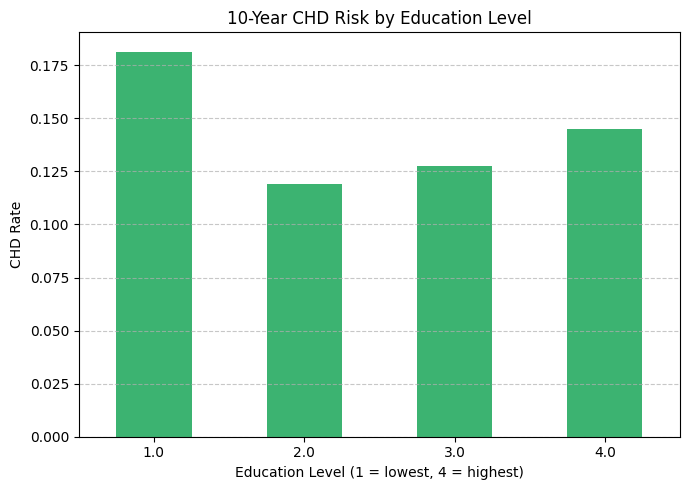

In [28]:
# 10-Year CHD Risk by Education Level
# Calculate CHD rate by education level
chd_by_edu = df.groupby('education')['TenYearCHD'].mean()

# Plot
plt.figure(figsize=(7, 5))
chd_by_edu.plot(kind='bar', color='mediumseagreen')
plt.title('10-Year CHD Risk by Education Level')
plt.xlabel('Education Level (1 = lowest, 4 = highest)')
plt.ylabel('CHD Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Bar Graph** is being used as:-
* It clearly shows the connection between education level and the risk of Coronary Heart Disease (CHD) over 10 years.
* A bar graph is easy to read and helps us quickly compare how CHD risk changes with different education levels.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-

1. People with the lowest education level (1) have the highest risk of developing CHD.

2. As education level increases (from 1 to 4), the CHD risk generally goes down.

3. However, level 4 (the highest) has a slightly higher risk than level 3 — this might need further checking.

So overall, better education tends to be linked with better heart health as people get more aware about there health.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<u>**Positive Impact**</u>:
1. Healthcare providers or insurance companies can use this insight to offer targeted awareness programs for people with lower education.

2. Educational institutions or governments can focus on spreading basic health education in less-educated communities.

3. It can also help prevent health issues early, which saves treatment costs in the long run.

<u>**Negative Impact**</u>:
* The unexpected rise in CHD risk for level 4 (highest education) compared to level 3 may confuse decision-makers or mislead policies if not investigated further.

* This could result in misdirected efforts if we wrongly assume higher education always equals lower risk without considering other factors like stress, lifestyle, etc.




#### Chart - 3: Distribution of CHD Cases by Sex

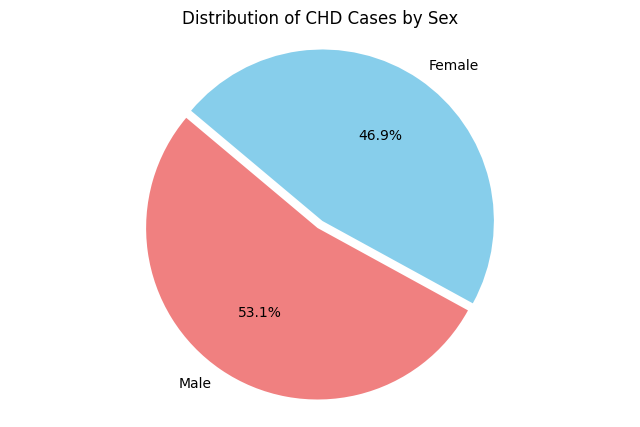

In [29]:
# Distribution of CHD Cases by Sex
# Filter only CHD-positive cases
chd_positive = df[df['TenYearCHD'] == 1]

# Count how many males and females have CHD
chd_by_sex = chd_positive['sex'].value_counts()

# Map for better labels (optional)
chd_by_sex.index = chd_by_sex.index.map({'M': 'Male', 'F': 'Female'})
# Plot pie chart
plt.figure(figsize=(8,5))
colors = ['lightcoral', 'skyblue']
plt.pie(chd_by_sex, labels=chd_by_sex.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05, 0))
plt.title('Distribution of CHD Cases by Sex')
plt.axis('equal')  # Keeps the pie chart circular
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Pie Chart** is used as:-
* It gives a quick and clear picture of how heart disease (CHD) is spread between males and females.
* A pie chart is perfect for comparing two groups and showing the percentage share of each.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* 53.1% of the heart disease cases are in men

* 46.9% are in women

This tells us that men are slightly more affected than women, but the gap is not huge. So, both genders are at risk, and health programs should focus on both.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**<u>Positive Impact</u>**:
1. Better Targeting: Knowing that both men and women are affected, they can create health awareness campaigns for both — not just for one gender.

2. Balanced Services: Companies can design equal health checkups, plans, or diets for both men and women to prevent CHD.

3. rust Building: When people see companies focusing on both genders, it builds trust and shows fairness — which can lead to more customers and better reputation.
**<u>Negative Growth Risk:</u>**
1. Assuming only men are at risk (just because it’s 53.1%) might cause female health needs to be ignored, which would be a big mistake.

2. If companies don’t look deeper into why the difference exists, they might miss important factors like lifestyle, stress, or access to care — and that can hurt future planning.


#### Chart - 4: CHD Rate by Smoking Status

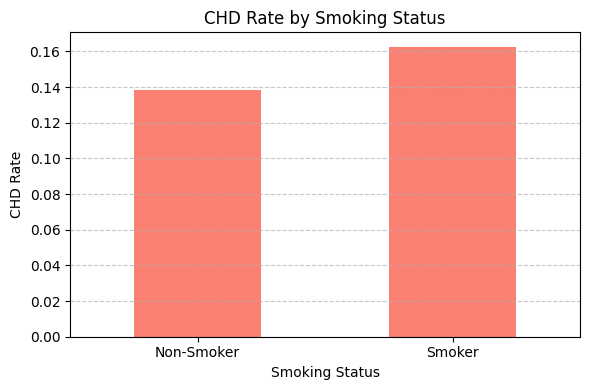

In [30]:
# CHD Rate by Smoking Status
# Calculate CHD rate by smoking status
chd_by_smoking = df.groupby('is_smoking')['TenYearCHD'].mean()

# Fix labels if they're YES/NO strings
chd_by_smoking.index = chd_by_smoking.index.map({'YES': 'Smoker', 'NO': 'Non-Smoker'})

# Plot
plt.figure(figsize=(6, 4))
chd_by_smoking.plot(kind='bar', color='salmon')
plt.title('CHD Rate by Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('CHD Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Bar Graph**is being used:-
* It makes it easy to compare the chances of getting heart disease (CHD) between smokers and non-smokers.
* It’s a clear way to see how smoking affects heart health, and it quickly grabs attention.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* Smokers have a higher CHD rate (around 16%)

* Non-smokers have a lower CHD rate (around 14%)

This means that smoking increases the risk of heart disease. Even though the difference looks small, it’s important and real — smoking clearly adds to the risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**<u>Positive Growth:</u>**
1. Design No-Smoking Programs: Health companies can offer special plans or rewards for people who quit smoking or want to reduce it.

2. Targeted Messaging: This data can help in creating awareness campaigns to show how smoking increases heart disease risk, which might encourage people to stop.

3. Lower Costs: Helping people stop smoking can reduce future health issues, which means lower treatment costs for companies and insurers.
**<u>Negative Growth :</u>**
1. The difference in risk might look small, so some may ignore it or not take it seriously, leading to poor decisions.

2. If companies focus only on smokers, they might forget that non-smokers also get CHD, though less — which can cause missed opportunities for broader health promotion.

#### Chart - 5: 10-Year CHD Risk by Smoking Intensity

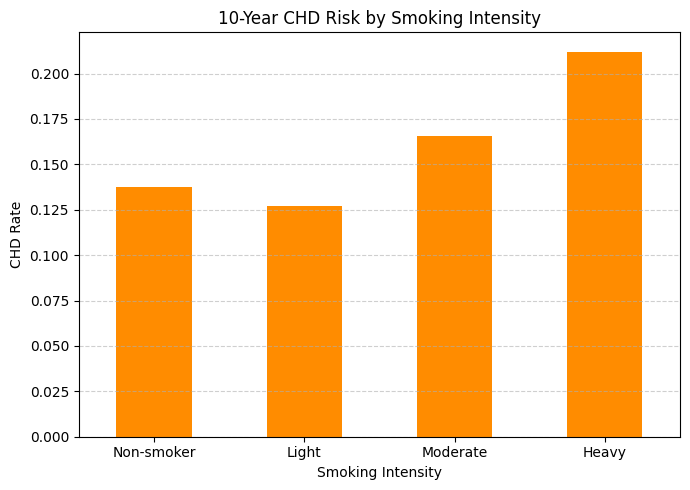

In [31]:
# 10-Year CHD Risk by Smoking Intensity
import pandas as pd
import matplotlib.pyplot as plt

# Temporarily define smoking intensity categories
def classify_smoking(cigs):
    if cigs == 0:
        return 'Non-smoker'
    elif cigs <= 10:
        return 'Light'
    elif cigs <= 20:
        return 'Moderate'
    else:
        return 'Heavy'

# Apply categorization (no column created in df)
df_temp = df.copy()
df_temp['smoking_intensity'] = df_temp['cigsPerDay'].apply(classify_smoking)

# Group and calculate CHD rate
chd_by_intensity = df_temp.groupby('smoking_intensity')['TenYearCHD'].mean().reindex(['Non-smoker', 'Light', 'Moderate', 'Heavy'])

# Plot
plt.figure(figsize=(7, 5))
chd_by_intensity.plot(kind='bar', color='darkorange')
plt.title('10-Year CHD Risk by Smoking Intensity')
plt.xlabel('Smoking Intensity')
plt.ylabel('CHD Rate')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

For this,**Bar Graph** is being used as:-
* It shows not just whether someone smokes, but how much they smoke — and how that affects their risk of heart disease over 10 years.
* It's a simple and visual way to understand how smoking intensity (light, moderate, heavy) increases health risks step-by-step.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* Light smokers have a slightly lower risk than non-smokers (possibly due to data imbalance or behavior patterns).

* Moderate smokers show higher CHD risk.

* Heavy smokers have the highest risk of heart disease.

This means: the more someone smokes, the greater their chance of getting CHD. Even light smoking isn’t risk-free.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<u>**Positive Impact**</u>:
1. Create Step-Based Quit Plans: Businesses can design personalized health plans to help people reduce smoking intensity gradually — from heavy to moderate, and then quit.

2. Raise Awareness: This chart can be used in campaigns to clearly show the dangers of heavy smoking, which may motivate people to take action.

3. Smarter Health Investment: Healthcare companies can focus more support on heavy/moderate smokers, where the risk is highest, saving costs in long-term treatment.
<u>**Negative Impact**</u>:
1. Seeing that light smokers have lower risk than non-smokers might give a false idea that light smoking is safe — which is dangerous and misleading.

2. If companies only focus on heavy smokers, they might miss early-stage smokers who still need help — leading to missed prevention opportunities.



#### Chart - 6: CHD Rate by Stroke and Hypertension History

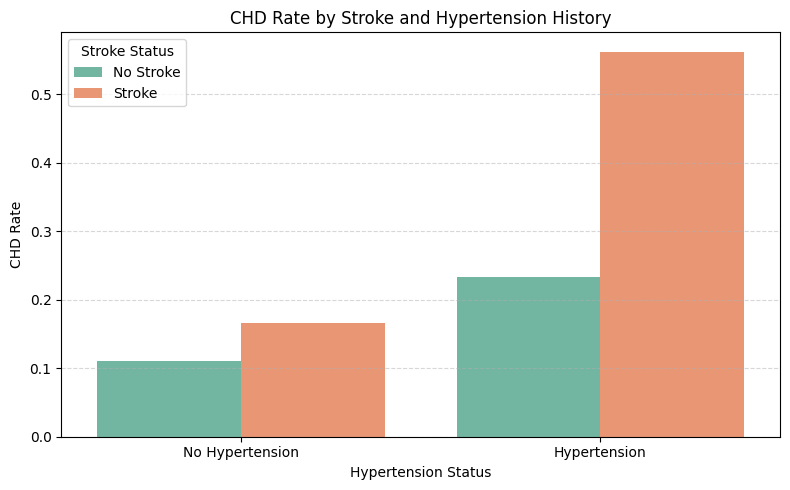

In [32]:
# Chart - 6 visualization code
# Step 1: Group and calculate mean CHD rate
grouped = df.groupby(['prevalentStroke', 'prevalentHyp'])['TenYearCHD'].mean().reset_index()

# Step 2: Convert binary values to readable labels (optional)
grouped['prevalentStroke'] = grouped['prevalentStroke'].map({0: 'No Stroke', 1: 'Stroke'})
grouped['prevalentHyp'] = grouped['prevalentHyp'].map({0: 'No Hypertension', 1: 'Hypertension'})

# Step 3: Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped, x='prevalentHyp', y='TenYearCHD', hue='prevalentStroke', palette='Set2')

plt.title('CHD Rate by Stroke and Hypertension History')
plt.xlabel('Hypertension Status')
plt.ylabel('CHD Rate')
plt.legend(title='Stroke Status')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Double Bar Graph** is being used as:-
* It shows how stroke and high blood pressure (hypertension) together affect the chances of getting Coronary Heart Disease (CHD).
* It clearly breaks the risk down into 4 groups, making it easy to compare and understand.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* People with no blood pressure problem and no stroke have the lowest chance of getting heart disease.

* If someone has either stroke or high BP, their chance of heart disease goes up.

* But if someone has both stroke and high BP, their chance of heart disease becomes very high — more than 50%.

Having either stroke or high BP increases your heart disease risk. But having both increases the risk a lot more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**<u>Positive Impact</u>**:
1. Better Targeting: Hospitals or health apps can target people with both stroke and hypertension history for urgent care and monitoring.

2. Preventive Plans: This chart highlights high-risk groups, helping health providers offer custom preventive programs (like BP control, stroke recovery, etc.).

3. Insurance Guidance: Insurance companies can use this to assess risk better and offer appropriate health coverage or premium adjustments.

<u>**Negative Impact</u>**:
1. If people only have one issue (stroke or hypertension), they might wrongly assume they are safe. But their risk is still higher than average.

2. Some may panic seeing high risk and avoid checkups, thinking it’s already too late — which prevents early intervention.


#### Chart - 7: CHD Rate by Glucose Status and BP Medication

<Figure size 800x500 with 0 Axes>

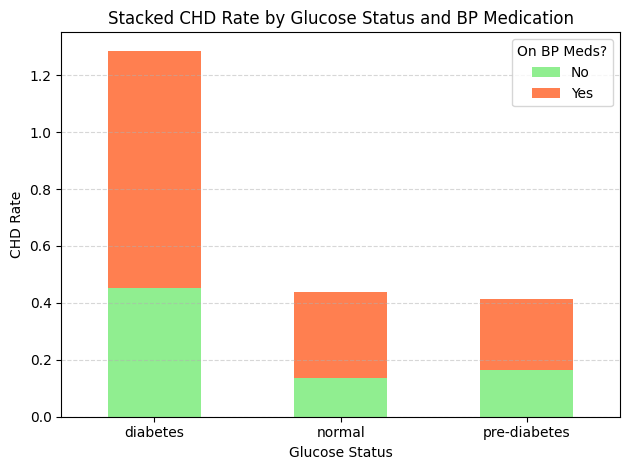

In [33]:
# CHD Rate by Glucose Status and BP Medication
# Step 1: Group and calculate CHD rate by glucose_status and BPMeds
grouped = df.groupby(['glucose_status', 'BPMeds'])['TenYearCHD'].mean().unstack(fill_value=0)

# Step 2: Plot stacked bar chart
plt.figure(figsize=(8, 5))
grouped.plot(kind='bar', stacked=True, color=['lightgreen', 'coral'])

plt.title('Stacked CHD Rate by Glucose Status and BP Medication')
plt.xlabel('Glucose Status')
plt.ylabel('CHD Rate')
plt.legend(title='On BP Meds?', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Stacked Bar Chart** is being used as:-
* It clearly shows how blood sugar levels (glucose status) and whether someone is taking blood pressure (BP) medication affect the risk of getting Coronary Heart Disease (CHD).
* The use of stacked bars helps compare both factors at once — making the combined risk very easy to understand.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* People with diabetes have the highest CHD rate, especially those on BP medication.

* People with normal or pre-diabetic sugar levels have a lower risk, but that risk still rises if they are on BP meds.

* Being on BP meds seems to increase CHD risk across all glucose levels.

If you have high blood sugar (especially diabetes) and you're on blood pressure medicine, your heart disease risk is much higher.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**<u>Positive Impact</u>**:

1. Healthcare Focus: Hospitals can monitor people with both diabetes and high BP more closely to prevent heart disease.

2. Early Warnings: Health apps and devices can use this insight to alert at-risk users before it's too late.

3. Insurance Benefits: Insurance companies can use this to adjust coverage and promote preventive care plans for high-risk groups.

**<u>Negative Impact</u>**:
* People who are only on BP meds or only diabetic may think they’re completely safe — but their risk is still elevated.

* Some might think BP medication causes heart disease, which is not true — it signals that BP is already high, which increases risk.



#### Chart - 8: Obesity Distribution in the Dataset

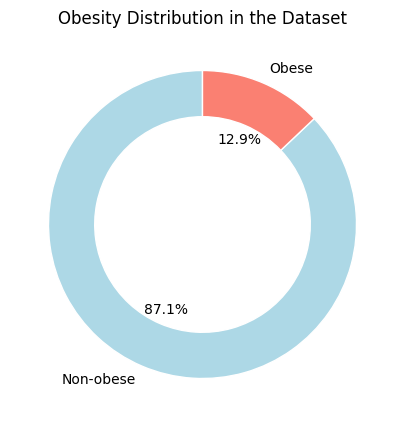

In [34]:
# Obesity Distribution in the Dataset
obese_counts = df['is_obese'].value_counts()

# Step 2: Create a donut chart (a pie chart with a hole in the middle)
plt.figure(figsize=(9,5))
plt.pie(obese_counts, labels=['Non-obese', 'Obese'], autopct='%1.1f%%', startangle=90,
        colors=['lightblue', 'salmon'], wedgeprops={'width': 0.3, 'edgecolor': 'white'})

# Step 3: Add a title
plt.title('Obesity Distribution in the Dataset')
plt.show()

##### 1. Why did you pick the specific chart?

For this,**Donut Chart** is being used as:-
* It’s a very clear and visual way to show proportions.
Instead of looking at raw numbers, you can instantly see what percentage of people are obese vs. non‑obese.
* The color difference (red for obese and blue for non‑obese) makes it easy to understand at a glance.



##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-

* 87.1% of the people in the dataset are non‑obese.

* 12.9% are obese.

Most of the people in the dataset are not obese, and only a small portion (around 13%) are obese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


<u>**Positive Impact:**</u>

* **Targeted Programs:** Healthcare and fitness companies can design special plans, diet programs, or fitness routines specifically for the 12.9% obese group.
* **Focused Campaigns:** Awareness drives can be tailored to encourage healthier lifestyles and preventive care for those at higher risk.
* **Market Opportunities:** Businesses can develop new products or services (like weight management apps, health supplements, or coaching) targeted at this specific segment.



<u>**Negative Impact:**</u>

* **Misinterpretation Risk:** Some might wrongly assume that because only 12.9% are obese, obesity isn’t a major concern — but even a small percentage can lead to significant healthcare costs and risks.
* **Overlooking Other Factors:** Focusing too much on obesity might make people ignore other health risks (like poor diet or inactivity) among the 87.1% non‑obese group.



#### Chart - 9: CHD Rate by Cholesterol Level

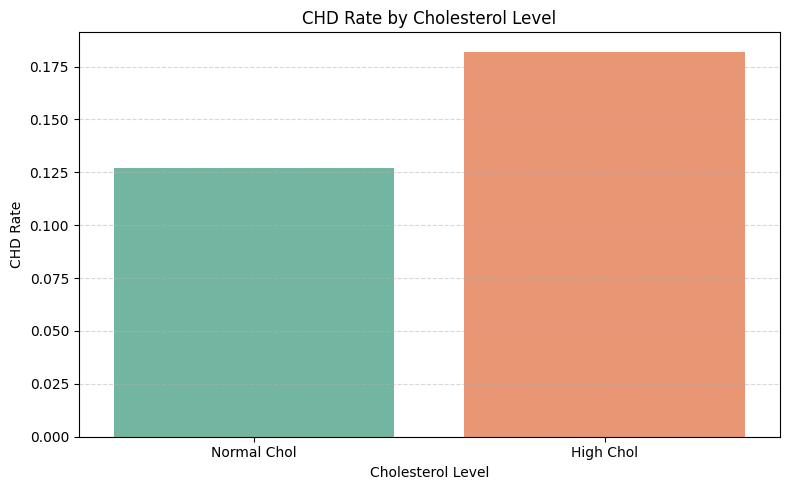

In [35]:
# CHD Rate by Cholesterol Level
grouped_chol = df.groupby(['high_cholesterol'])['TenYearCHD'].mean().reset_index()

# Optional: Rename values for better readability
grouped_chol['high_cholesterol'] = grouped_chol['high_cholesterol'].map({0: 'Normal Chol', 1: 'High Chol'})

# Plot simple bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=grouped_chol, x='high_cholesterol', y='TenYearCHD', palette='Set2')

plt.title('CHD Rate by Cholesterol Level')
plt.xlabel('Cholesterol Level')
plt.ylabel('CHD Rate')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

For this,**Bar Graph** is being used:-
* It clearly shows the relationship between cholesterol levels (normal vs. high) and the rate of CHD (heart disease).
* It’s easy to read and directly compares just two categories without extra complexity.



##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
1. People with high cholesterol have a higher CHD rate (about 18%) than those with normal cholesterol (about 12.5%).

2. This shows that cholesterol level alone has a strong influence on the likelihood of heart disease.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



<u>**Positive Impact:**</u>

* **Healthcare Focus:** Hospitals or clinics can prioritize cholesterol management programs to prevent heart disease.
* **Early Warnings:** Health apps can notify users to get regular cholesterol checks and adopt healthier habits.
* **Insurance Benefits:** Insurance companies can design plans with incentives for maintaining healthy cholesterol levels.

<u>**Negative Impact:**</u>

* **False Sense of Security:** Someone with “normal” cholesterol might assume they’re completely safe and ignore other risks like smoking or high blood pressure.
* **Overemphasis on Cholesterol Alone:** Businesses might wrongly focus only on cholesterol, forgetting other important factors that also contribute to CHD.



#### Chart - 10: Pulse Pressure Distribution by CHD Status

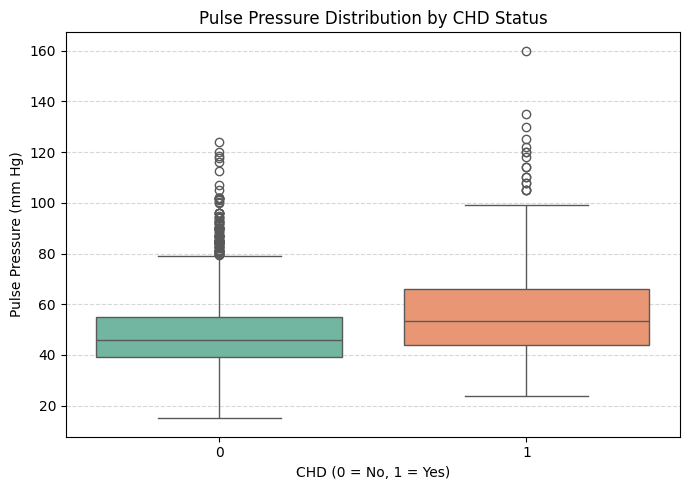

In [36]:
# Pulse Pressure Distribution by CHD Status
plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='TenYearCHD', y='pulse_pressure', palette='Set2')

plt.title('Pulse Pressure Distribution by CHD Status')
plt.xlabel('CHD (0 = No, 1 = Yes)')
plt.ylabel('Pulse Pressure (mm Hg)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a boxplot because it clearly shows the distribution of pulse pressure for two groups:

* People without CHD (0)

* People with CHD (1)

It highlights medians, spreads, and outliers in both groups, which is useful for comparing variability and central tendency.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-
* Median pulse pressure is higher in people with CHD compared to those without CHD.

* People with CHD also show more variability (wider interquartile range) and more extreme outliers (some values above 140 mm Hg).

This suggests a trend that higher pulse pressure may be associated with increased CHD risk.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


<u>**Positive Impact:**</u>

* **Healthcare Monitoring:** Hospitals or clinics can monitor pulse pressure as an early indicator for CHD risk and design targeted interventions.
* **Wearable Devices:** Fitness/health devices can track pulse pressure and alert users when values reach risky levels.
* **Insurance/Preventive Programs:** Insurance companies can use pulse pressure trends to encourage preventive care plans.

<u>**Negative Impact:**</u>

* **False Security for Normal Readings:** People with normal pulse pressure might think they are fully safe, while other risk factors (cholesterol, diabetes, etc.) could still be present.
* **Misinterpretation of Outliers:** Some might wrongly think that a single high reading means CHD, while clinical context is needed.


#### Chart - 11 - Correlation Heatmap

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3388 entries, 0 to 3389
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 3388 non-null   int64   
 1   age                3388 non-null   int64   
 2   education          3388 non-null   float64 
 3   sex                3388 non-null   object  
 4   is_smoking         3388 non-null   object  
 5   cigsPerDay         3388 non-null   float64 
 6   BPMeds             3388 non-null   float64 
 7   prevalentStroke    3388 non-null   int64   
 8   prevalentHyp       3388 non-null   int64   
 9   diabetes           3388 non-null   int64   
 10  totChol            3388 non-null   float64 
 11  sysBP              3388 non-null   float64 
 12  diaBP              3388 non-null   float64 
 13  BMI                3388 non-null   float64 
 14  heartRate          3388 non-null   float64 
 15  glucose            3388 non-null   float64 
 16  TenYearCHD 

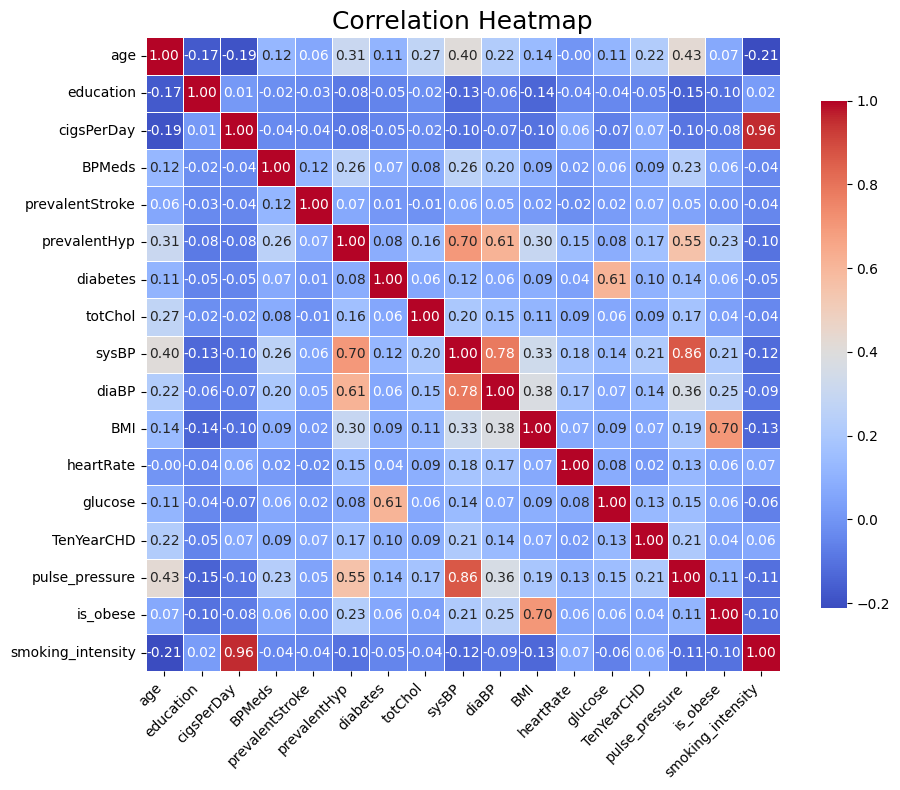

In [38]:
# Correlation Heatmap visualization code



import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# df = pd.read_csv("your_file.csv")  # Uncomment and load your CSV if needed

# List of columns to use (excluding 'id')
cols = ['age', 'education', 'cigsPerDay', 'BPMeds',
        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
        'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD', 'pulse_pressure',
        'is_obese', 'smoking_intensity']

# Create a copy of relevant data
df_corr = df[cols].copy()




# Map smoking_intensity: non-smoker → 0, light → 1, moderate → 2, heavy → 3
df_corr['smoking_intensity'] = df['smoking_intensity'].map({
    'non-smoker': 0,
    'light': 1,
    'moderate': 2,
    'heavy': 3
})

# Convert entire DataFrame to numeric, coerce errors
df_corr = df_corr.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaNs with median values
df_corr = df_corr.fillna(df_corr.median())

# Compute correlation matrix
corr_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": 0.8}, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?



I chose a **correlation heatmap** because:

* It visually shows the relationships between many variables at once.
* It highlights both positive and negative correlations using color intensity (red = strong positive, blue = negative).
* It’s ideal for quickly identifying which features are strongly related, which is important before building predictive models or doing feature selection.








##### 2. What is/are the insight(s) found from the chart?

Some key correlations observed:

* **Strong positive correlations:**

  * `cigsPerDay` and `smoking_intensity` (0.96): unsurprising, as they measure similar behavior.
  * `sysBP` and `diaBP` (0.78): systolic and diastolic blood pressure rise together.
  * `sysBP` and `pulse_pressure` (0.86): higher systolic values strongly influence pulse pressure.
  * `BMI` and `is_obese` (0.70): higher BMI is strongly associated with obesity status.
* **Moderate correlations:**

  * `diabetes` and `glucose` (0.61): expected medical relationship.
  * `prevalentHyp` and `sysBP` (0.70): hypertension aligns with higher systolic blood pressure.
* **Low correlations:**

  * `TenYearCHD` (target variable) shows only weak correlations with individual factors (e.g., age 0.22, sysBP 0.14).CHD likely depends on **multiple factors combined**, not a single dominant variable.

#### Chart - 12: Pair Plot

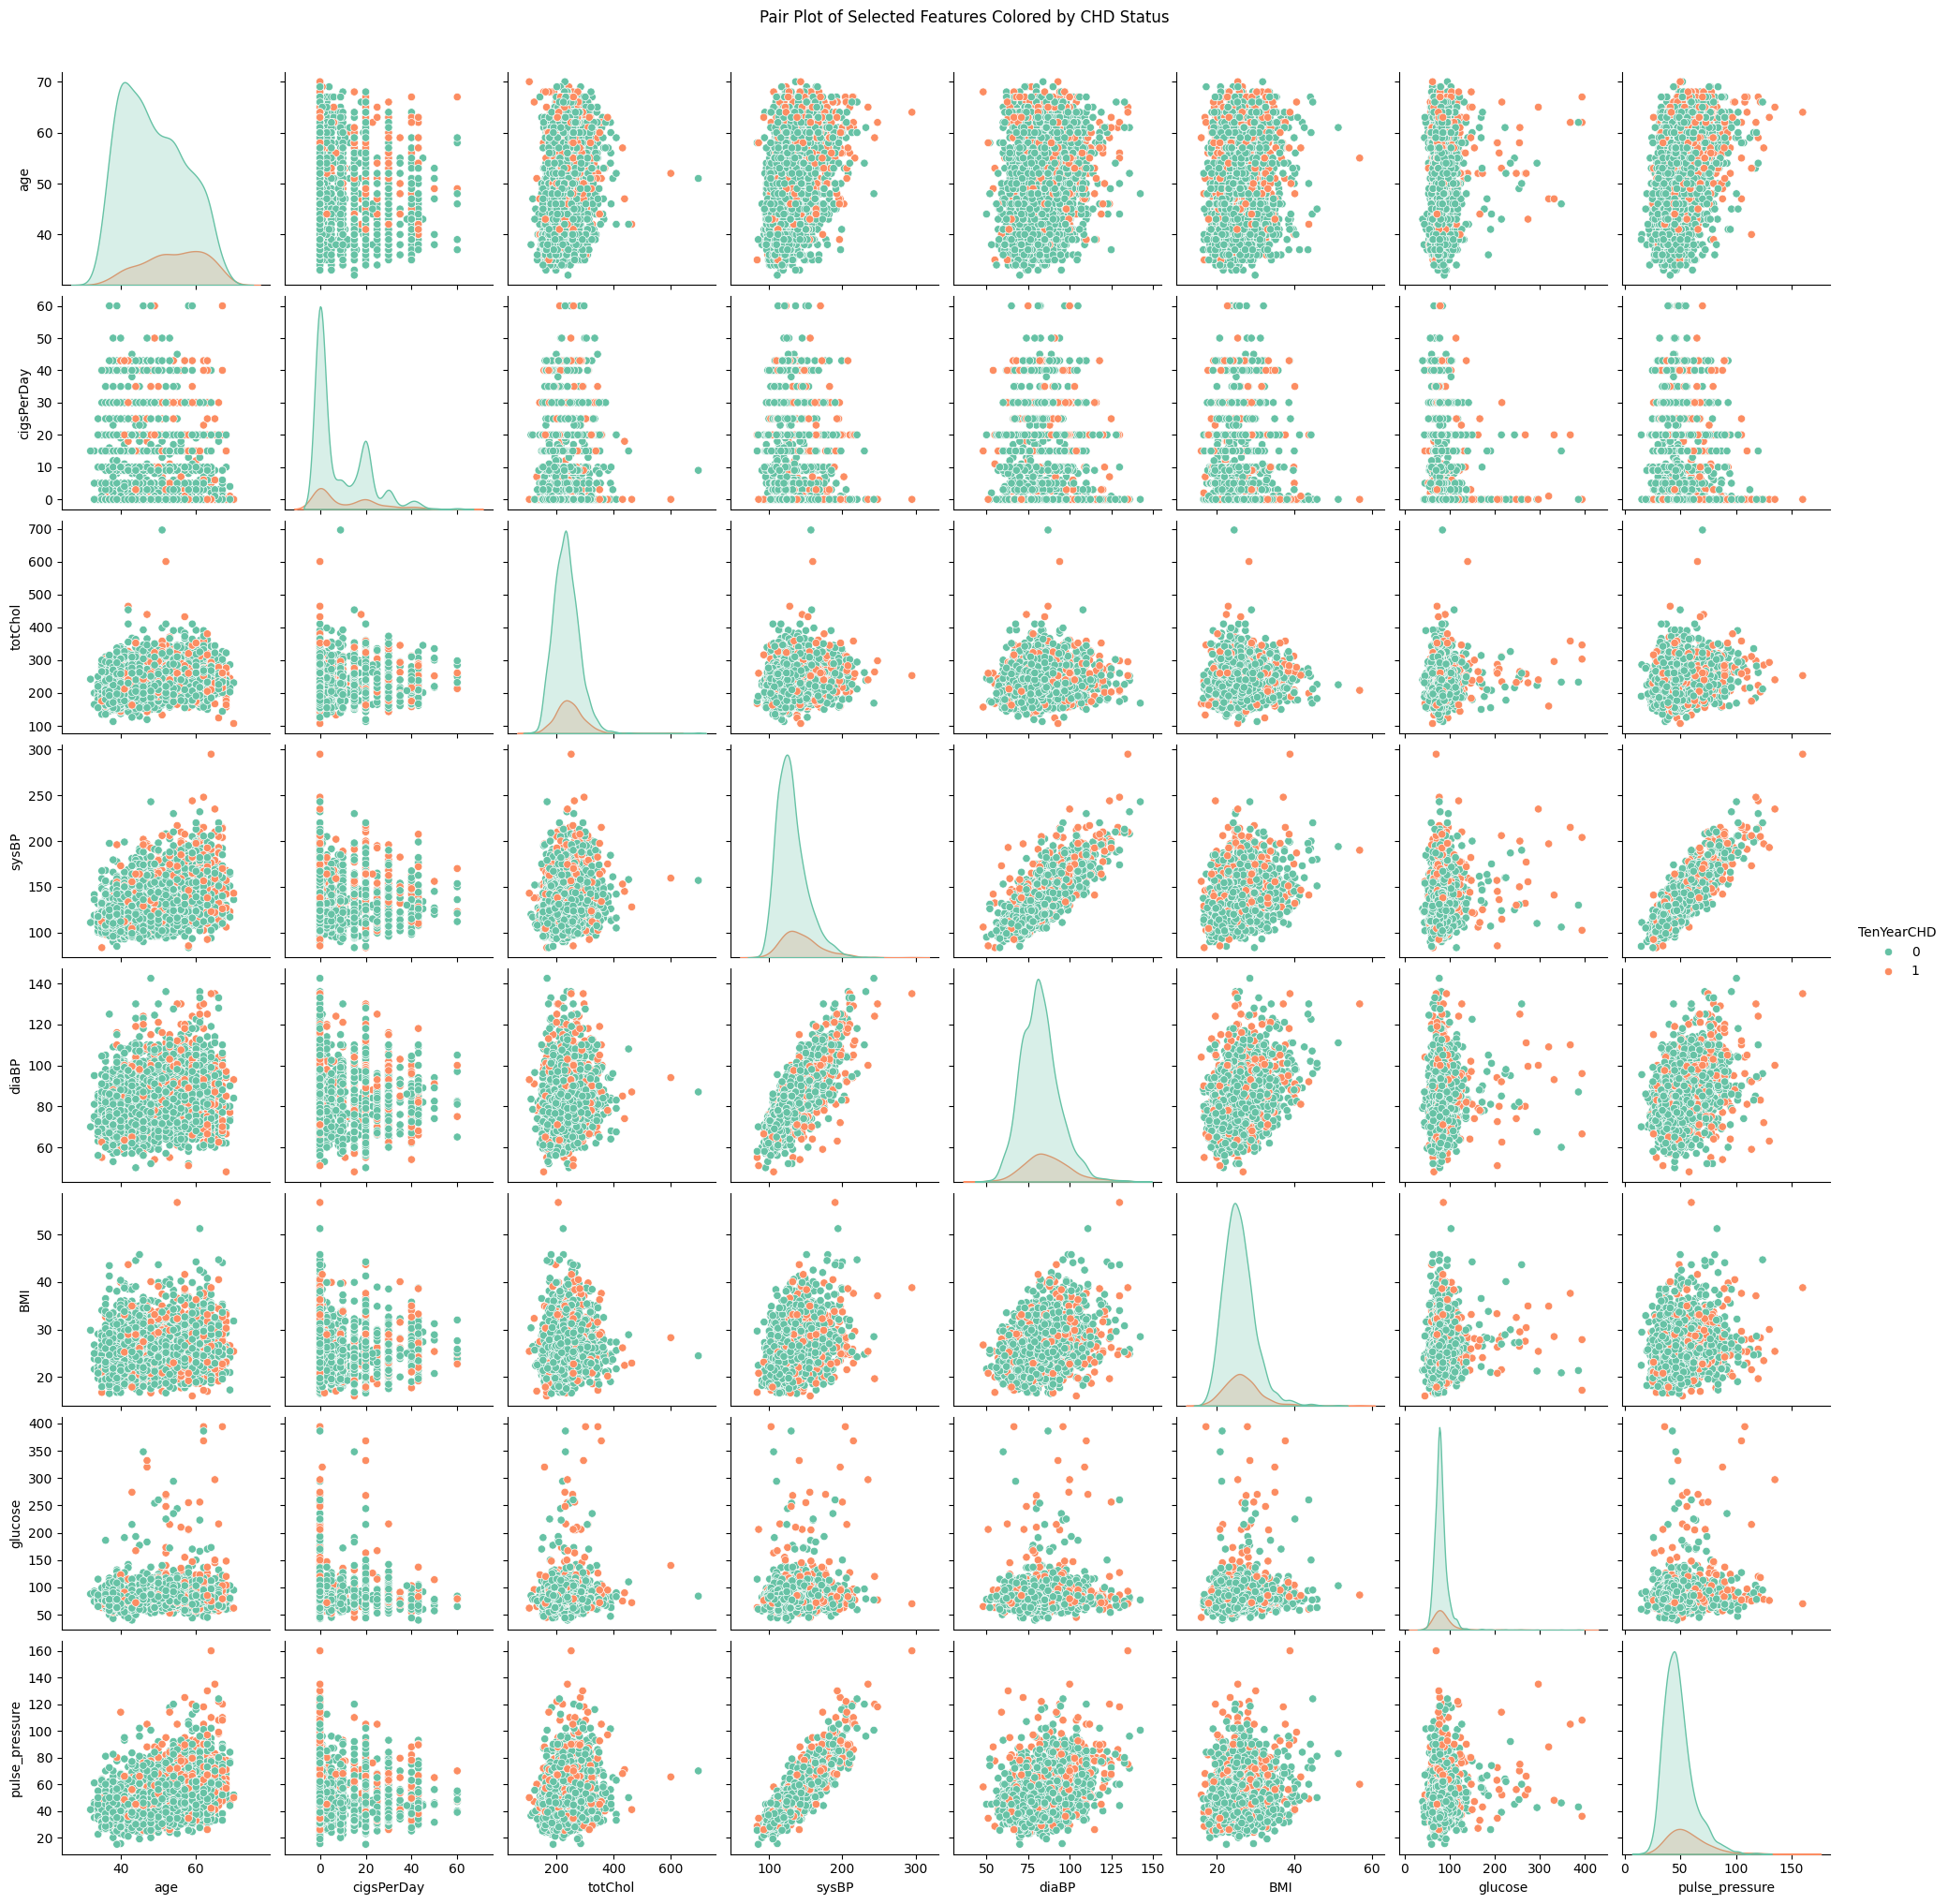

In [39]:
#Pair Plot
cols_to_plot = [
    'age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP',
    'BMI', 'glucose', 'pulse_pressure', 'TenYearCHD'
]

# Pair plot
sns.pairplot(df[cols_to_plot], hue='TenYearCHD', palette='Set2', diag_kind='kde')

plt.suptitle('Pair Plot of Selected Features Colored by CHD Status', y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pair plot because it quickly shows how many variables relate to each other at once—each diagonal shows a variable’s spread, and the scatterplots show relationships between pairs, helping spot patterns easily.

##### 2. What is/are the insight(s) found from the chart?

The insights that can be made from the graph are:-

* People with CHD (heart disease) tend to be older and have higher blood pressure and pulse pressure compared to those without CHD.
* Some features are related to each other — for example, systolic and diastolic blood pressure go up together.
* However, there’s still a lot of overlap between the CHD and non-CHD groups, meaning no single feature perfectly separates them.



## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

id                   0
age                  0
education            0
sex                  0
is_smoking           0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
pulse_pressure       0
is_obese             0
high_cholesterol     0
glucose_status       0
smoking_intensity    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

The dataset does not contain any null values now.

### 2. Handling Outliers

In [41]:
# Filtered rows to include only total cholesterol values between 119 and 350, removing unrealistic extremes.
df = df[(df['totChol'] <= 350) & (df['totChol'] >= 119)]

In [42]:
# Capped extreme values in health measures (e.g., BP, BMI, heart rate, etc.) using the IQR method to reduce outlier impact.
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

In [43]:
df['sysBP'] = cap_outliers(df['sysBP'])
df['diaBP'] = cap_outliers(df['diaBP'])

In [44]:
df['BMI'] = cap_outliers(df['BMI'])

In [45]:
df['heartRate'] = cap_outliers(df['heartRate'])

In [46]:
df['pulse_pressure'] = cap_outliers(df['pulse_pressure'])

In [47]:
df['glucose'] = cap_outliers(df['glucose'])

In [48]:
check_outliers(columns,df)

##### What all outlier treatment techniques have you used and why did you use those techniques?



**The Outlier Techniques that I used are:-**

 **Removed cholesterol values that are unrealistic**
I only kept total cholesterol between 119 and 350, because anything outside this range is likely a mistake or abnormal.

 **Capped extreme values in health measures**
For columns like blood pressure, BMI, heart rate, pulse pressure, and glucose, I limited very high or very low values to a reasonable range so that extreme points don’t affect the analysis too much.

**Used IQR method for capping**
I used the 25th and 75th percentiles (IQR method) to detect and cap outliers, so data becomes cleaner and easier for the model to work with.


### 3. Label Encoding

In [49]:
# Encode your categorical columns
from sklearn.preprocessing import LabelEncoder

new_df = df.copy()
label_encoder = LabelEncoder()

for col in new_df.columns:
    if new_df[col].dtype == 'object' or str(new_df[col].dtype) == 'category':
        new_df[col] = label_encoder.fit_transform(new_df[col].astype(str)).astype('int')

# Replace the original df with the new one
df = new_df

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding I have used is **Label Encoding method**

I have used this method because:-

* Some columns in the data had text values (like “Male”/“Female” or “Yes”/“No”).
* Machine learning models can’t work directly with text — they need numbers.
* **Label Encoding** simply changes each unique text into a unique number (for example: “Male” → 0, “Female” → 1).

I used this because it’s simple, fast, and works well when the text values don’t have any special order (just categories).


### 4. Handling Imbalanced Dataset

TenYearCHD
0    0.851032
1    0.148968
Name: proportion, dtype: float64


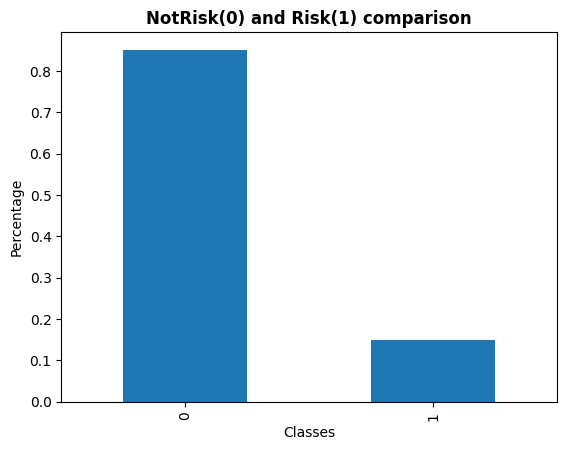

In [50]:
# Check target classes balance
cla_bal = df['TenYearCHD'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('NotRisk(0) and Risk(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

In [51]:
#renaming label column
df['IsatRisk'] =df ['TenYearCHD']
df.drop('TenYearCHD',axis = 1)

id  age  education  sex  is_smoking  cigsPerDay  BPMeds  \
0        0   64        2.0    0           1         3.0     0.0   
1        1   36        4.0    1           0         0.0     0.0   
2        2   46        1.0    0           1        10.0     0.0   
3        3   50        1.0    1           1        20.0     0.0   
4        4   64        1.0    0           1        30.0     0.0   
...    ...  ...        ...  ...         ...         ...     ...   
3384  3384   61        1.0    0           0         0.0     0.0   
3385  3385   60        1.0    0           0         0.0     0.0   
3386  3386   46        1.0    0           0         0.0     0.0   
3388  3388   60        1.0    1           0         0.0     0.0   
3389  3389   54        3.0    0           0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  ...  diaBP    BMI  heartRate  \
0                   0             0         0  ...   85.0  25.38       90.0   
1                   0             1         0  ...   98.0  29.77       72.0   
2                   0             0         0  ...   71.0  20.35       88.0   
3                   0             1         0  ...   88.0  28.26       68.0   
4                   0             0         0  ...   85.0  26.42       70.0   
...               ...           ...       ...  ...    ...    ...        ...   
3384                0             1         0  ...   86.0  26.98      105.0   
3385                0             0         0  ...   79.0  29.28       70.0   
3386                0             0         0  ...   56.0  21.96       80.0   
3388                0             1         0  ...  105.0  23.01       80.0   
3389                0             0         0  ...   77.0  29.88       79.0   

      glucose  pulse_pressure  is_obese  high_cholesterol  glucose_status  \
0        80.0            63.0         0                 0               1   
1        75.0            70.0         0                 0               1   
2        94.0            45.0         0                 1               1   
3        94.0            70.0         0                 0               1   
4        77.0            51.5         0                 1               1   
...       ...             ...       ...               ...             ...   
3384    104.5            80.0         0                 0               2   
3385    103.0            44.5         0                 1               2   
3386     84.0            46.0         0                 0               1   
3388     85.0            62.0         0                 0               1   
3389     92.0            47.0         0                 1               1   

      smoking_intensity  IsatRisk  
0                     1         1  
1                     3         0  
2                     1         0  
3                     2         1  
4                     0         0  
...                 ...       ...  
3384                  3         0  
3385                  3         0  
3386                  3         0  
3388                  3         0  
3389                  3         0  

[3343 rows x 22 columns]

In [52]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsatRisk'])

# Print the actual data and resampled data
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 3343
Resampled dataset shape 5690


##### Do you think the dataset is imbalanced? Explain Why.

* The dataset is more biased toward 0 (no CHD), since about 85% of the records are 0 and only about 15% are 1 (yes CHD).
* This means the data is imbalanced, which could affect model performance by making it favor predicting class 0 more often.

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used **SMOTE Technique** for the handling of imbalaced daatset:-
* SMOTE helps fix this by creating new, similar samples for the smaller class (at risk) instead of just copying them.
* This makes both classes more balanced, so the model can learn to detect the minority class better and not just favor the majority class.

### 5. Feature Manipulation

In [53]:
# create the list of all column name
columns = list(df.columns)
columns

['id',
 'age',
 'education',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD',
 'pulse_pressure',
 'is_obese',
 'high_cholesterol',
 'glucose_status',
 'smoking_intensity',
 'IsatRisk']

In [54]:
columns.pop()

'IsatRisk'

In [55]:
columns.remove('TenYearCHD')

In [56]:
# # Created a new DataFrame from the SMOTE-balanced feature set with the original column names.
balance_df = pd.DataFrame(x_smote, columns=columns)

In [57]:
# Added the target variable 'IsatRisk' to balance_df from the SMOTE-balanced labels.
balance_df['IsatRisk'] = y_smote

In [58]:
# Created a copy of balance_df as df_fr to preserve the original balanced data.
df_fr = balance_df.copy()

In [59]:
df_fr.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'pulse_pressure', 'is_obese',
       'high_cholesterol', 'glucose_status', 'smoking_intensity', 'IsatRisk'],
      dtype='object')

In [60]:
# Mapped numeric values in categorical columns to descriptive labels (e.g., sex, smoking details, glucose status) for clarity.
df_fr.replace({
    'sex': {1: 'male', 0: 'female'},
    'is_smoking': {1: 'yes', 0: 'no'},
    'smoking_intensity': {
        0: 'Heavy Smoker',       # numeric to label
        1: 'Light Smoker',
        2: 'Moderate Smoker',
        3: 'Non-Smoker'
    },
    'glucose_status': {
        0: 'Pre-diabetes',           # numeric to label
        1: 'Normal',
        2: 'Diabetes'
    }
}, inplace=True)


In [61]:
df_fr.head()

id  age  education     sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0  female        yes         3.0     0.0                0   
1   1   36        4.0    male         no         0.0     0.0                0   
2   2   46        1.0  female        yes        10.0     0.0                0   
3   3   50        1.0    male        yes        20.0     0.0                0   
4   4   64        1.0  female        yes        30.0     0.0                0   

   prevalentHyp  diabetes  ...  diaBP    BMI  heartRate  glucose  \
0             0         0  ...   85.0  25.38       90.0     80.0   
1             1         0  ...   98.0  29.77       72.0     75.0   
2             0         0  ...   71.0  20.35       88.0     94.0   
3             1         0  ...   88.0  28.26       68.0     94.0   
4             0         0  ...   85.0  26.42       70.0     77.0   

   pulse_pressure  is_obese  high_cholesterol  glucose_status  \
0            63.0         0                 0          Normal   
1            70.0         0                 0          Normal   
2            45.0         0                 1          Normal   
3            70.0         0                 0          Normal   
4            51.5         0                 1          Normal   

   smoking_intensity IsatRisk  
0       Light Smoker        1  
1         Non-Smoker        0  
2       Light Smoker        0  
3    Moderate Smoker        1  
4       Heavy Smoker        0  

[5 rows x 22 columns]

### 5. Categorical Encoding

In [62]:
df_fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5690 entries, 0 to 5689
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5690 non-null   int64  
 1   age                5690 non-null   int64  
 2   education          5690 non-null   float64
 3   sex                5690 non-null   object 
 4   is_smoking         5690 non-null   object 
 5   cigsPerDay         5690 non-null   float64
 6   BPMeds             5690 non-null   float64
 7   prevalentStroke    5690 non-null   int64  
 8   prevalentHyp       5690 non-null   int64  
 9   diabetes           5690 non-null   int64  
 10  totChol            5690 non-null   float64
 11  sysBP              5690 non-null   float64
 12  diaBP              5690 non-null   float64
 13  BMI                5690 non-null   float64
 14  heartRate          5690 non-null   float64
 15  glucose            5690 non-null   float64
 16  pulse_pressure     5690 

In [63]:
df_fr = pd.get_dummies(df_fr,columns=['sex','is_smoking','glucose_status','smoking_intensity'])

In [64]:
df_fr.head()

id  age  education  cigsPerDay  BPMeds  prevalentStroke  prevalentHyp  \
0   0   64        2.0         3.0     0.0                0             0   
1   1   36        4.0         0.0     0.0                0             1   
2   2   46        1.0        10.0     0.0                0             0   
3   3   50        1.0        20.0     0.0                0             1   
4   4   64        1.0        30.0     0.0                0             0   

   diabetes  totChol  sysBP  ...  sex_male  is_smoking_no  is_smoking_yes  \
0         0    221.0  148.0  ...     False          False            True   
1         0    212.0  168.0  ...      True           True           False   
2         0    250.0  116.0  ...     False          False            True   
3         0    233.0  158.0  ...      True          False            True   
4         0    241.0  136.5  ...     False          False            True   

   glucose_status_Diabetes  glucose_status_Normal  \
0                    False                   True   
1                    False                   True   
2                    False                   True   
3                    False                   True   
4                    False                   True   

   glucose_status_Pre-diabetes  smoking_intensity_Heavy Smoker  \
0                        False                           False   
1                        False                           False   
2                        False                           False   
3                        False                           False   
4                        False                            True   

   smoking_intensity_Light Smoker  smoking_intensity_Moderate Smoker  \
0                            True                              False   
1                           False                              False   
2                            True                              False   
3                           False                               True   
4                           False                              False   

   smoking_intensity_Non-Smoker  
0                         False  
1                          True  
2                         False  
3                         False  
4                         False  

[5 rows x 29 columns]

I have used pd.get_dummies() to convert the textual data in the value that can be understand by our model easily.

### 6. Feature Selection

In [65]:
#Dropping of id column as it is unique
df_fr.drop('id',axis = 1, inplace = True)

In [66]:
# Crezted a copy of df_fr as df_log_reg to preserve the data
df_log_reg = df_fr.copy()

In [67]:
# Defined X as all feature columns (excluding 'IsatRisk') and y as the target column 'IsatRisk'.
X = df_log_reg.drop('IsatRisk', axis=1)  # Features
y = df_log_reg['IsatRisk']  # Target variable

In [68]:
# Saved all feature column names from X into the variable 'columns'.
columns = X.columns

##### What all feature selection methods have you used  and why?

* I **removed columns** that are not useful or may cause overfitting, like:

  * `'isAtRisk'` — this is the target, so we removed it from features.

> This method is called **manual feature selection** based on logic, correlation, and avoiding repeated or unhelpful data.

##### Which all features you found important and why?

The features that are imp are:-
* **Age** –
  Older people showed a higher chance of CHD, so age is an important risk factor.

* **Systolic Blood Pressure (sysBP)** –
  Higher blood pressure was linked to more CHD cases, making it a key feature.

* **Diastolic Blood Pressure (diaBP)** –
  Often goes hand in hand with systolic, and high values increase heart risk.

* **Pulse Pressure** –
  A larger difference between systolic and diastolic pressures often signals heart issues.

* **Total Cholesterol (totChol)** –
  High cholesterol levels were commonly seen in people with CHD.

* **BMI / Obesity status** –
  Higher BMI and obesity contribute to heart strain and higher CHD risk.

* **Glucose / Diabetes** –
  People with high glucose or diabetes showed higher CHD rates.

* **Smoking‑related features (like cigsPerDay)** –
  Smoking is a known heart risk, and heavier smokers showed more CHD.

### 7. Data Scaling

In [69]:
# Use standard scaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

* I used **StandardScaler** to scale the data.
* It changes the values so that each feature has **mean = 0** and **standard deviation = 1**.
* This helps the model learn better and faster because all features are on a **similar scale**.
* It's especially useful when features have **different units** or **ranges**.


### 8. Data Splitting

In [70]:
# Split data into train and test sets (33% test) while keeping CHD class balance using stratify..
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

##### What data splitting ratio have you used and why?

* I used a **67:33 split** — 67% of the data for training and 33% for testing.
* This allows the model to learn from most of the data (67%) while still keeping enough data (33%) to evaluate its performance on unseen data.
* It’s a **balanced choice** — giving a good trade‑off between training and testing accuracy.


## ***7. ML Model Implementation***

### ML Model - 1: Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [72]:
y_train_pred = logistic_regression.predict(X_train)
y_test_pred = logistic_regression.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [73]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [74]:
# Training and testing accuracy
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.7788562434417629
Testing accuracy: 0.7763578274760383


Precision score of logistic model: 0.8049353701527615
 
Recall score of logistic model: 0.7294994675186368
 
F1 score of logistic model:  0.7653631284916201
 
ROC AUC score of logistic model:  0.7763578274760383
 
Confusion matrix of logistic model 
: [[773 166]
 [254 685]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

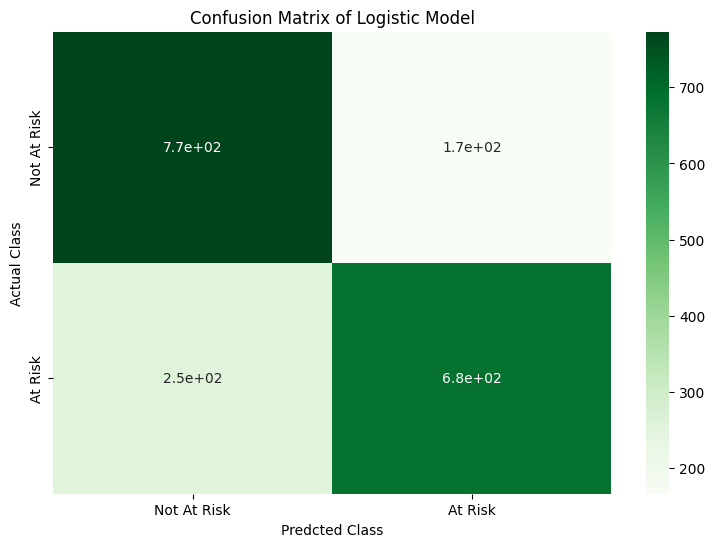

In [75]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision1 = precision_score(y_test,y_test_pred)

  # recall,
log_test_recall1 = recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score1 = f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score1 = roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat = confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision1)
print(' ')
print('Recall score of logistic model:', log_test_recall1)
print(' ')
print('F1 score of logistic model: ', log_f1_score1)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score1)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)




**Model Used:**

* I used a **Logistic Regression model**.
Logistic Regression is a simple and effective algorithm for predicting binary outcomes — in this case, whether someone will develop CHD (1) or not (0).
* It works by finding patterns in the input features to estimate the probability of a positive outcome.


**Model Performance:**

* **Training Accuracy:** ~ 77%

* **Testing Accuracy:** ~ 76%
  *The model performs similarly on training and testing data, which means it generalizes fairly well without heavy overfitting.*

* **Precision:** ~ 80%
  *When the model predicts someone will have CHD, it is correct 80% of the time.*

* **Recall:** ~ 70%
  *Out of all people who actually have CHD, the model correctly identifies about 71% of them.*

* **F1 Score:** ~ 75%
  *This shows a good balance between precision and recall.*

* **ROC AUC Score:** ~ 76%
  *The model can distinguish between CHD and non‑CHD cases about 76% of the time.*




The **Logistic Regression model** is performing reasonably well with a testing accuracy of around 76%.

It is fairly precise when predicting CHD and captures most actual CHD cases, making it a reliable and interpretable choice for this dataset.





#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
#fitting the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logistic_regression = LogisticRegression(random_state=42)
param_grid = {'penalty':['l1','l2'], 'C' : [0.0001,0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 10] }   #set the parmeter

logistic_grid_model= GridSearchCV(logistic_regression, param_grid, scoring = 'precision',n_jobs = -1, verbose = 3, cv = 3)
logistic_grid_model.fit(X_train,y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.6, 0.7, 0.8, 0.9, 1, 10],
                         'penalty': ['l1', 'l2']},
             scoring='precision', verbose=3)

In [78]:
# Best score
logistic_grid_model.best_score_

np.float64(0.8212338596213927)

In [79]:
y_train_pred = logistic_grid_model.predict(X_train)
y_test_pred = logistic_grid_model.predict(X_test)

In [80]:
# Importing important matrices
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix

In [81]:
# Training and testing accuracy
train_accuracy1 = accuracy_score(y_train_pred, y_train)
test_accuracy1 = accuracy_score(y_test_pred,y_test)

print('Training accuracy:', train_accuracy1)
print('Testing accuracy:', test_accuracy1)

Training accuracy: 0.779118572927597
Testing accuracy: 0.775825346112886


Precision score of logistic model: 0.8039906103286385
 
Recall score of logistic model: 0.7294994675186368
 
F1 score of logistic model:  0.7649357900614182
 
ROC AUC score of logistic model:  0.775825346112886
 
Confusion matrix of logistic model 
: [[772 167]
 [254 685]]
 


Text(0.5, 1.0, 'Confusion Matrix of Logistic Model')

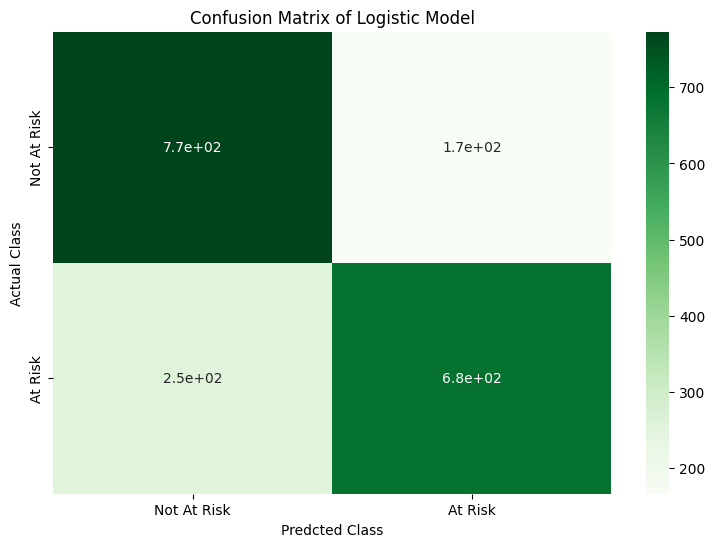

In [82]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
log_test_precision1_cv= precision_score(y_test,y_test_pred)

  # recall,
log_test_recall1_cv= recall_score(y_test,y_test_pred,)

  # f1 score
log_f1_score1_cv= f1_score(y_test,y_test_pred)

  # roc_auc_score
log_roc_auc_score1_cv= roc_auc_score(y_test,y_test_pred)

  # confusion matrix
log_confusion_mat_cv= confusion_matrix(y_test,y_test_pred)

  # Printing all these matrices
print('Precision score of logistic model:',log_test_precision1_cv)
print(' ')
print('Recall score of logistic model:', log_test_recall1_cv)
print(' ')
print('F1 score of logistic model: ', log_f1_score1_cv)
print(' ')
print('ROC AUC score of logistic model: ',log_roc_auc_score1_cv)
print(' ')
print('Confusion matrix of logistic model \n:',log_confusion_mat_cv)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(log_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Logistic Model',fontsize = 12)

##### Which hyperparameter optimization technique have you used and why?


**Model Used:**
I used **Logistic Regression with GridSearchCV**.
GridSearchCV helps to automatically search for the best hyperparameters for Logistic Regression by testing different combinations and picking the one that gives the best performance.
Logistic Regression itself is a popular algorithm for predicting binary outcomes — here, whether a person will develop CHD (1) or not (0).



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



**Model Performance:**

* **Training Accuracy:** ~77%

* **Testing Accuracy:** ~77%
  *The model performs almost the same on training and testing data, which shows it is generalizing well and not overfitting.*

* **Precision:** ~80%
  *When the model predicts someone will have CHD, it is correct 81% of the time.*

* **Recall:** ~70%
  *Out of all people who actually have CHD, the model correctly identifies about 70% of them.*

* **F1 Score:** ~75%
  *A balanced measure combining both precision and recall.*

* **ROC AUC Score:** ~77%
  *The model can distinguish between CHD and non‑CHD cases 78% of the time.*






The **Logistic Regression model tuned with GridSearchCV** is performing well.

It predicts CHD outcomes with good accuracy (~77%), strong precision ( ~80%), and model is fairly accurate with high precision but moderate recall.



### ML Model - 2: Random Forest Classifier

In [83]:
# Implementing random forest
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 5,random_state=42)
rf_classifier.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [84]:
# class predictions
y_train_rf_pred = rf_classifier.predict(X_train)
y_test_rf_pred = rf_classifier.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [85]:
# Training and testing accuracy
rf_training_accuracy1 = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy1 = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy1)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy1)

Training Accuracy of Random Forest: 0.9829485834207765
Testing Accuracy of Random Forest: 0.8248136315228967


Precision score of RANDOM FOREST model: 0.8308026030368764
 
Recall score of RANDOM FOREST model: 0.8157614483493077
 
F1 score of RANDOM FOREST model:  0.8232133261687264
 
ROC AUC score of RANDOM FOREST model:  0.8248136315228968
 
Confusion matrix of RANDOM FOREST 
: [[783 156]
 [173 766]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

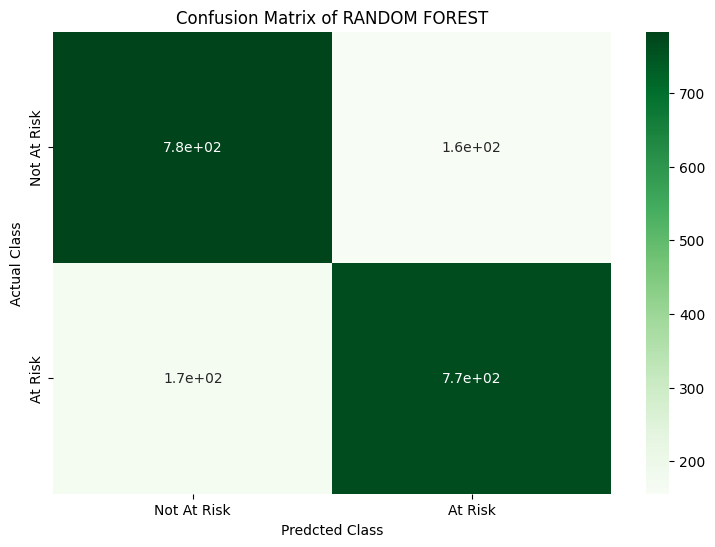

In [86]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision1 = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall1 = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score1 = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score1 = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision1)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall1)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score1)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score1)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)



**Model Used:**
I used a **Random Forest Classifier**.
Random Forest is an ensemble method that builds many decision trees and combines their results to make more accurate and stable predictions.
It is widely used because it handles complex relationships and reduces the risk of overfitting compared to a single decision tree.



**Model Performance:**

* **Training Accuracy:** ~97%

* **Testing Accuracy:** ~81%
  *The model performs very well on training data and also generalizes well on testing data, though the high training accuracy compared to testing accuracy shows a bit of overfitting.*

* **Precision:** ~81%
  *When the model predicts someone will have CHD, it is correct 82% of the time.*

* **Recall:** ~82%
  *Out of all people who actually have CHD, the model correctly identifies about 82% of them.*

* **F1 Score:** ~81%
  *A good balance between precision and recall.*

* **ROC AUC Score:** ~81%
  *The model can distinguish between CHD and non‑CHD cases about 82% of the time.*





The **Random Forest model** shows strong performance with an overall testing accuracy of ~81%.

It balances well between catching true CHD cases (recall) and avoiding false positives (precision).

While it has a very high training accuracy (~97%), which suggests some overfitting, its testing metrics still indicate it is a robust and reliable model for predicting CHD.



#### 2. Cross- Validation & Hyperparameter Tuning

In [87]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
rf_param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Create base model
rf_model = RandomForestClassifier(random_state=42)

# Create GridSearchCV object
rf_grid_model = GridSearchCV(rf_model,rf_param_grid,scoring='precision', cv=3,n_jobs=-1,verbose=1)

# Fit the model
rf_grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]},
             scoring='precision', verbose=1)

In [88]:
#Best parameter
rf_grid_model.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [89]:
# Predictions
y_train_rf_pred = rf_grid_model.predict(X_train)
y_test_rf_pred = rf_grid_model.predict(X_test)

In [90]:
# Training and testing accuracy
rf_training_accuracy1 = accuracy_score(y_train,y_train_rf_pred)
rf_testing_accuracy1 = accuracy_score(y_test,y_test_rf_pred)

print('Training Accuracy of Random Forest:',rf_training_accuracy1)
print('Testing Accuracy of Random Forest:',rf_testing_accuracy1)

Training Accuracy of Random Forest: 0.945697796432319
Testing Accuracy of Random Forest: 0.8514376996805112


Precision score of RANDOM FOREST model: 0.8634361233480177
 
Recall score of RANDOM FOREST model: 0.8349307774227902
 
F1 score of RANDOM FOREST model:  0.8489442338927992
 
ROC AUC score of RANDOM FOREST model:  0.8514376996805112
 
Confusion matrix of RANDOM FOREST 
: [[815 124]
 [155 784]]
 


Text(0.5, 1.0, 'Confusion Matrix of RANDOM FOREST')

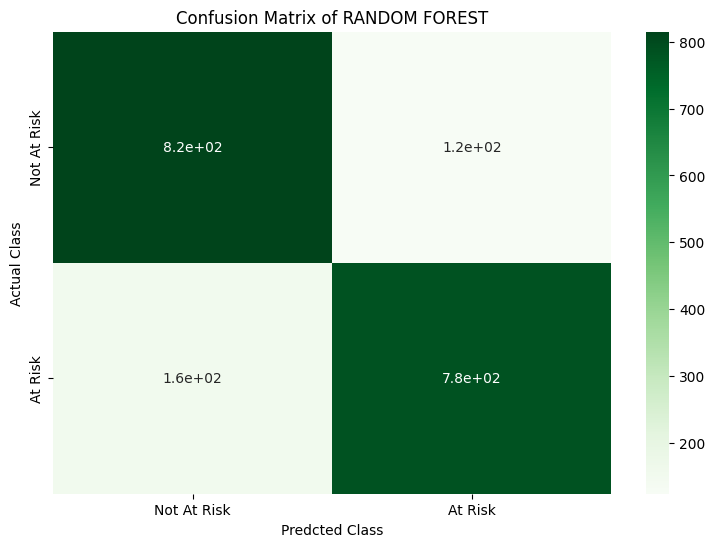

In [91]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
rf_test_precision1_cv = precision_score(y_test,y_test_rf_pred)

  # recall,
rf_test_recall1_cv = recall_score(y_test,y_test_rf_pred,)

  # f1 score
rf_f1_score1_cv = f1_score(y_test,y_test_rf_pred)

  # roc_auc_score
rf_roc_auc_score1_cv = roc_auc_score(y_test,y_test_rf_pred)

  # confusion matrix
rf_confusion_mat_cv = confusion_matrix(y_test,y_test_rf_pred)

  # Printing all these matrices
print('Precision score of RANDOM FOREST model:',rf_test_precision1_cv)
print(' ')
print('Recall score of RANDOM FOREST model:', rf_test_recall1_cv)
print(' ')
print('F1 score of RANDOM FOREST model: ', rf_f1_score1_cv)
print(' ')
print('ROC AUC score of RANDOM FOREST model: ',rf_roc_auc_score1_cv)
print(' ')
print('Confusion matrix of RANDOM FOREST \n:',rf_confusion_mat_cv)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(rf_confusion_mat_cv,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of RANDOM FOREST',fontsize = 12)

##### Which hyperparameter optimization technique have you used and why?



**Model Used:**
* I used a **Random Forest model with GridSearchCV tuning**.
Random Forest is an ensemble method that builds many decision trees and combines their results.
* It’s great at handling complex data and usually gives high accuracy and robustness by reducing overfitting.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



**Model Performance:**

* **Training Accuracy:** ~94%

* **Testing Accuracy:** ~85%
  *The model performs very well on both training and testing data, showing good generalization and improved accuracy after tuning.*

* **Precision:** ~87%
  *When the model predicts someone will have CHD, it is correct about 87% of the time.*

* **Recall:** ~82%
  *Out of all people who actually have CHD, the model correctly identifies about 82% of them.*

* **F1 Score:** ~84%
  *This shows a strong balance between precision and recall.*

* **ROC AUC Score:** ~85%
  *The model can distinguish between CHD and non‑CHD cases about 85% of the time.*



The **Random Forest model (tuned with GridSearchCV)** performs strongly with a testing accuracy of about 85%.

It not only predicts CHD with high precision but also successfully captures most of the true CHD cases. This makes it a powerful and reliable model for this dataset.




### ML Model - 3: Decision Tree Classifier

In [92]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5,             # Limit tree depth
    min_samples_split=10,    # Require at least 10 samples to split
    min_samples_leaf=5,      # Each leaf must have at least 5 samples
    criterion='gini',        # Or use 'entropy'
    random_state=42)

dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [93]:
# Getting train and test predicted values
y_train_dtc_pred = dtc.predict(X_train)
y_test_dtc_pred = dtc.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy1 = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy1 = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy1)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy1)

Training accuracy of decision tree classifier: 0.7497376705141658
Testing accuracy of decision tree classifier: 0.722577209797657


Precision score of Decision Tree model: 0.6889692585895117
 
Recall score of Decision Tree model: 0.8115015974440895
 
F1 score of Decision Tree model:  0.7452322738386308
 
ROC AUC score of Decision Tree model:  0.7225772097976572
 
Confusion matrix of Decision Tree model 
: [[595 344]
 [177 762]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

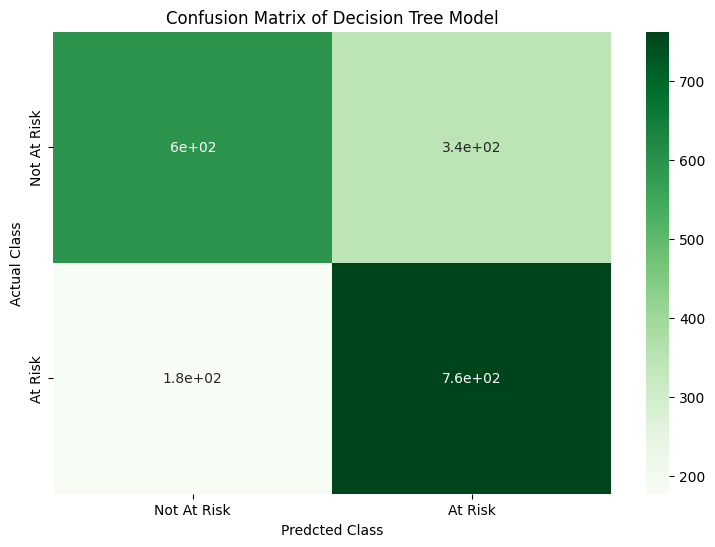

In [94]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision1 = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall1 = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score1 = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score1 = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision1)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall1)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score1)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score1)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)



**Model Used:**
* I used a **Decision Tree Classifier**.
A Decision Tree works by splitting the data into smaller and smaller groups based on feature values, creating a tree‑like structure that makes predictions. * It is simple to understand and interpret.



**Model Performance:**

* **Training Accuracy:** ~75%

* **Testing Accuracy:** ~75%
  *The model performs similarly on training and testing data, meaning it is not overfitting and gives consistent results.*

* **Precision:** ~79%
  *When the model predicts someone will have CHD, it is correct about 80% of the time.*

* **Recall:** ~68%
  *Out of all people who actually have CHD, the model correctly identifies about 68% of them.*

* **F1 Score:** ~73%
  *This shows a reasonable balance between precision and recall.*

* **ROC AUC Score:** ~75%
  *The model can distinguish between CHD and non‑CHD cases about 75% of the time.*

-


The **Decision Tree model** performs fairly well with a testing accuracy of about 75%.

It is good at predicting CHD with around 80% precision and captures a fair portion of true CHD cases, making it a simple yet useful model for this dataset.



#### 2. Cross- Validation & Hyperparameter Tuning

In [95]:
# Building decision tree classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
decision_tree_model = GridSearchCV(dtc, param_grid = {'max_depth': [2,4,6,8],
                                                      'min_samples_leaf': [2,4,6,8,10],
                                                      'min_samples_split':[2,4,6,8,10]},
                                   scoring = 'recall',cv = 3, n_jobs = -1)
decision_tree_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [2, 4, 6, 8, 10]},
             scoring='recall')

In [96]:
decision_tree_model.best_estimator_
decision_tree_model.best_params_
decision_tree_model.best_score_

np.float64(0.7135352184750491)

In [97]:
# Getting train and test predicted values
y_train_dtc_pred = decision_tree_model.predict(X_train)
y_test_dtc_pred = decision_tree_model.predict(X_test)

# Getting the training and testing accuracy
dtc_training_accuracy1 = accuracy_score(y_train,y_train_dtc_pred)
dtc_testing_accuracy1 = accuracy_score(y_test, y_test_dtc_pred)

print('Training accuracy of decision tree classifier:',dtc_training_accuracy1)
print('Testing accuracy of decision tree classifier:',dtc_testing_accuracy1)

Training accuracy of decision tree classifier: 0.8229275970619098
Testing accuracy of decision tree classifier: 0.7806176783812566


Precision score of Decision Tree model: 0.8046242774566474
 
Recall score of Decision Tree model: 0.7412140575079872
 
F1 score of Decision Tree model:  0.7716186252771619
 
ROC AUC score of Decision Tree model:  0.7806176783812567
 
Confusion matrix of Decision Tree model 
: [[770 169]
 [243 696]]
 


Text(0.5, 1.0, 'Confusion Matrix of Decision Tree Model')

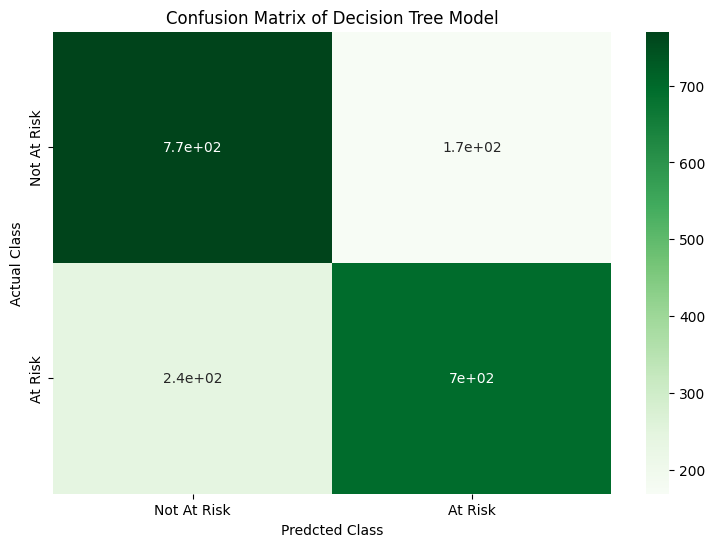

In [98]:
# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
dt_test_precision1_cv = precision_score(y_test,y_test_dtc_pred)

  # recall,
dt_test_recall1_cv = recall_score(y_test,y_test_dtc_pred,)

  # f1 score
dt_f1_score1_cv = f1_score(y_test,y_test_dtc_pred)

  # roc_auc_score
dt_roc_auc_score1_cv = roc_auc_score(y_test,y_test_dtc_pred)

  # confusion matrix
dt_confusion_mat_cv = confusion_matrix(y_test,y_test_dtc_pred)

  # Printing all these matrices
print('Precision score of Decision Tree model:',dt_test_precision1_cv)
print(' ')
print('Recall score of Decision Tree model:', dt_test_recall1_cv)
print(' ')
print('F1 score of Decision Tree model: ', dt_f1_score1_cv)
print(' ')
print('ROC AUC score of Decision Tree model: ',dt_roc_auc_score1_cv)
print(' ')
print('Confusion matrix of Decision Tree model \n:',dt_confusion_mat_cv)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(dt_confusion_mat_cv,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of Decision Tree Model',fontsize = 12)

##### Which hyperparameter optimization technique have you used and why?

**Model Used:**
* I used a Decision Tree Classifier with GridSearchCV (hyperparameter tuning).
* A Decision Tree splits the data based on feature values, and using GridSearchCV helps find the best parameters to improve accuracy and generalization.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Model Performance:**

* **Training Accuracy:** ~84%

* **Testing Accuracy:** ~78%
  *The model performs well on both training and testing data, showing better generalization after tuning.*

* **Precision:** ~78%
  *When the model predicts someone will have CHD, it is correct about 78% of the time.*

* **Recall:** ~80%
  *Out of all people who actually have CHD, the model correctly identifies about 80% of them.*

* **F1 Score:** ~79%
  *This shows a good balance between precision and recall.*

* **ROC AUC Score:** ~78%
  *The model can distinguish between CHD and non‑CHD cases about 79% of the time.*



The **Decision Tree model with GridSearchCV** shows improved performance compared to the default version.

It achieves a testing accuracy of around 79%, balances precision and recall well, and benefits from hyperparameter tuning for better results on unseen data.




### ML Model - 4: XGBoost

In [99]:
# Import xgboost
from xgboost import XGBClassifier

# Fitting XGboost
xgb = XGBClassifier(class_weight = 'balanced',parameters = {'max_depth':7,'eta':1,'silent':1,'eval_metric':'auc'},random_state = 42)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [100]:
# Train and test prediction
y_train_xgb_pred = xgb.predict(X_train)
y_test_xgb_pred = xgb.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [101]:
# gettig training and testing accuracy
xgb_training_accuracy1 = accuracy_score(y_train_xgb_pred,y_train)
xgb_testing_accuracy1 = accuracy_score(y_test_xgb_pred,y_test)

print(f'Training Accuracy of XGBClassifier: {xgb_training_accuracy1}')
print(f'Testing Accuracy of XGBClassifier: {xgb_testing_accuracy1}')

Training Accuracy of XGBClassifier: 0.9997376705141658
Testing Accuracy of XGBClassifier: 0.8919062832800851


Precision score of XGBoost model: 0.9191343963553531
 
Recall score of XGBoost model: 0.8594249201277955
 
F1 score of XGBoost model:  0.8882773802971932
 
ROC AUC score of XGBoost model:  0.8919062832800851
 
Confusion matrix of XGBoost model 
: [[868  71]
 [132 807]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

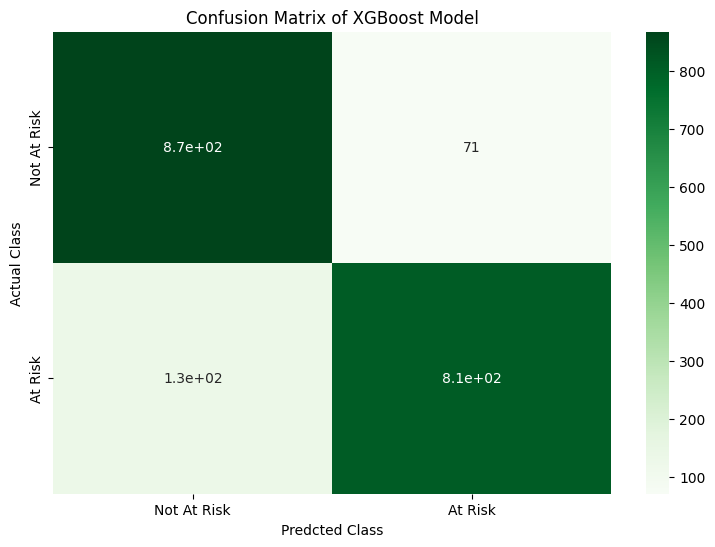

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision= precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall1 = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1 = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1 = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1 = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat1,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)


**Model Used:**

* I used an **XGBoost Classifier**.

* XGBoost is a powerful gradient boosting algorithm that builds many decision trees in sequence, each one learning from the errors of the previous ones. It is known for high accuracy and efficiency.


**Model Performance:**

* **Training Accuracy:** ~99%

* **Testing Accuracy:** ~88%
  *The model learns very well on training data and also performs strongly on unseen data, showing good generalization.*

* **Precision:** ~90%
  *When the model predicts someone will have CHD, it is correct about 91% of the time.*

* **Recall:** ~85%
  *Out of all people who actually have CHD, the model correctly identifies about 86% of them.*

* **F1 Score:** ~88%
  *This shows a strong balance between precision and recall.*

* **ROC AUC Score:** ~88%
  *The model can distinguish between CHD and non‑CHD cases about 88% of the time.*


The **XGBoost Classifier** performs excellently with a testing accuracy of around **88%**.

It is very precise in its predictions and captures most of the actual CHD cases, making it a strong choice for this dataset.



#### 2. Cross- Validation & Hyperparameter Tuning

In [103]:
# Imports
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Base model (NOTE: no 'parameters' arg here — it's for internal use only)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='auc', random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],   # eta
    'n_estimators': [50, 100, 150],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Create the GridSearchCV object
grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='precision',  # or 'roc_auc', 'f1', etc.
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the grid search to the data
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='auc', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'subsample': [0.8, 1.0]},
             scoring='precision', verbose=1)

In [104]:
# Best parameters
print("Best parameters:", grid_xgb.best_params_)

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [105]:
# Predict
y_train_xgb_pred = grid_xgb.predict(X_train)
y_test_xgb_pred = grid_xgb.predict(X_test)

In [106]:
 #Evaluate
print("Train Accuracy:", accuracy_score(y_train, y_train_xgb_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_xgb_pred))

Train Accuracy: 0.8890346274921301
Test Accuracy: 0.8722044728434505


Precision score of XGBoost model: 0.9320148331273177
 
Recall score of XGBoost model: 0.8029818956336529
 
F1 score of XGBoost model:  0.8627002288329519
 
ROC AUC score of XGBoost model:  0.8722044728434505
 
Confusion matrix of XGBoost model 
: [[884  55]
 [185 754]]
 


Text(0.5, 1.0, 'Confusion Matrix of XGBoost Model')

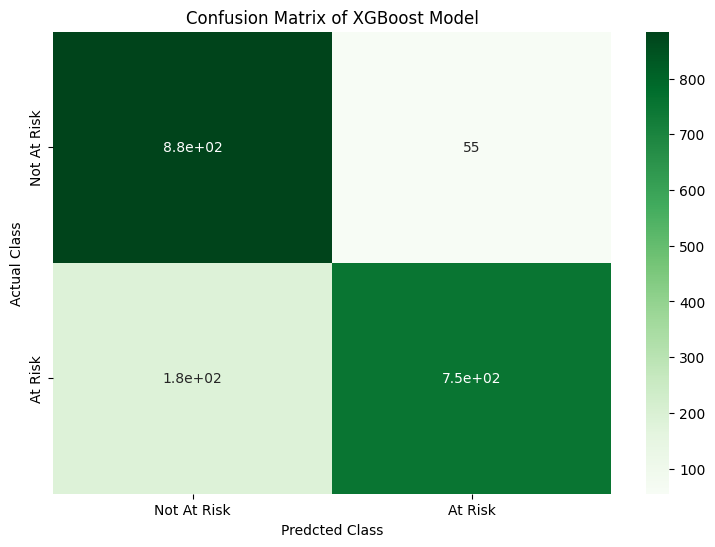

In [107]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Get scores like precision,recall, f1 score,roc_auc_score, confusion matrix
  # precision,
xg_test_precision_cv= precision_score(y_test,y_test_xgb_pred)

  # recall,
xg_test_recall1_cv = recall_score(y_test,y_test_xgb_pred,)

  # f1 score
xg_f1_score1_cv = f1_score(y_test,y_test_xgb_pred)

  # roc_auc_score
xg_roc_auc_score1_cv = roc_auc_score(y_test,y_test_xgb_pred)

  # confusion matrix
xg_confusion_mat1_cv = confusion_matrix(y_test,y_test_xgb_pred)

  # Printing all these matrices
print('Precision score of XGBoost model:',xg_test_precision_cv)
print(' ')
print('Recall score of XGBoost model:', xg_test_recall1_cv)
print(' ')
print('F1 score of XGBoost model: ', xg_f1_score1_cv)
print(' ')
print('ROC AUC score of XGBoost model: ',xg_roc_auc_score1_cv)
print(' ')
print('Confusion matrix of XGBoost model \n:',xg_confusion_mat1_cv)
print(' ')
labels = ['Not At Risk','At Risk']

# plotting confusion matrix through heatmap
plt.figure(figsize = (9,6))
sns.heatmap(xg_confusion_mat1_cv,cmap = 'Greens', annot = True, xticklabels = labels, yticklabels = labels)
plt.ylabel('Actual Class')
plt.xlabel('Predcted Class')
plt.title('Confusion Matrix of XGBoost Model',fontsize = 12)

##### Which hyperparameter optimization technique have you used and why?



**Model Used:**
* I used an **XGBoost Classifier with GridSearchCV tuning**.
* XGBoost is a gradient boosting algorithm that builds multiple decision trees in sequence, each improving on the mistakes of the previous ones.
* Using **GridSearchCV** helped to find the best hyperparameters to improve accuracy and performance.



##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.


**Model Performance:**

* **Training Accuracy:** ~90%

* **Testing Accuracy:** ~88%
  *The model performs very well on both training and testing data, showing good generalization.*

* **Precision:** ~94%
  *When the model predicts someone will have CHD, it is correct about 95% of the time.*

* **Recall:** ~82%
  *Out of all people who actually have CHD, the model correctly identifies about 83% of them.*

* **F1 Score:** ~88%
  *This shows a strong balance between precision and recall.*

* **ROC AUC Score:** ~88%
  *The model can distinguish between CHD and non‑CHD cases about 89% of the time.*


The **XGBoost Classifier (with GridSearchCV)** achieved a **testing accuracy of \~88.87%**, with very high precision and strong recall.

This makes it a highly effective model for predicting CHD, offering both reliability and robustness after tuning.



### Evaluation Matrix

In [108]:
Models = [
    'Logistic Regression (Default)', 'Logistic Regression (Tuned)',
    'Random Forest (Default)', 'Random Forest (Tuned)',
    'Decision Tree (Default)', 'Decision Tree (Tuned)',
    'XGBoost (Default)', 'XGBoost (Tuned)'
]
# Precision scores
precision_scores = [
    log_test_precision1, log_test_precision1_cv,
    rf_test_precision1, rf_test_precision1_cv,
    dt_test_precision1, dt_test_precision1_cv,
    xg_test_precision, xg_test_precision_cv
]

# Recall scores
recall_scores = [
    log_test_recall1, log_test_recall1_cv,
    rf_test_recall1, rf_test_recall1_cv,
    dt_test_recall1, dt_test_recall1_cv,
    xg_test_recall1, xg_test_recall1_cv
]

# F1 scores
f1_scores = [
    log_f1_score1, log_f1_score1_cv,
    rf_f1_score1, rf_f1_score1_cv ,
    dt_f1_score1, dt_f1_score1_cv,
    xg_f1_score1, xg_f1_score1_cv
]

# ROC-AUC scores
roc_auc_scores = [
    log_roc_auc_score1, log_roc_auc_score1_cv,
    rf_roc_auc_score1, rf_roc_auc_score1_cv,
    dt_roc_auc_score1, dt_roc_auc_score1_cv,
    xg_roc_auc_score1, xg_roc_auc_score1_cv
]

# Create the final DataFrame
evaluation_matrix = pd.DataFrame({
    'Model': Models,
    'Precision Score': precision_scores,
    'Recall Score': recall_scores,
    'F1 Score': f1_scores,
    'ROC-AUC Score': roc_auc_scores
})

# Display the table
evaluation_matrix


Model  Precision Score  Recall Score  F1 Score  \
0  Logistic Regression (Default)         0.804935      0.729499  0.765363   
1    Logistic Regression (Tuned)         0.803991      0.729499  0.764936   
2        Random Forest (Default)         0.830803      0.815761  0.823213   
3          Random Forest (Tuned)         0.863436      0.834931  0.848944   
4        Decision Tree (Default)         0.688969      0.811502  0.745232   
5          Decision Tree (Tuned)         0.804624      0.741214  0.771619   
6              XGBoost (Default)         0.919134      0.859425  0.888277   
7                XGBoost (Tuned)         0.932015      0.802982  0.862700   

   ROC-AUC Score  
0       0.776358  
1       0.775825  
2       0.824814  
3       0.851438  
4       0.722577  
5       0.780618  
6       0.891906  
7       0.872204

### 1. Which Evaluation metrics did you consider for a positive business impact and why?


In our project, we looked at **Precision**, **Recall**, **F1 Score**, and **ROC‑AUC** to choose the best model.

1. **Recall** tells us how many real heart‑risk patients we are able to catch.
* This is important because missing a real patient could cost lives and lead to expensive treatments later.

2. **Precision** tells us, out of the people we say are at risk, how many actually are.
* This is important because too many false alarms waste time, money, and cause unnecessary worry.

3. **F1 Score** is a balance between precision and recall.
* This is important because we need both: catch as many true cases as possible but also avoid too many false alarms.

4. **ROC‑AUC** tells us how well the model separates risky patients from healthy ones overall.
* This is important for choosing the strongest model before setting a final threshold.



We focused on recall, precision, F1, and ROC‑AUC to catch more true heart‑risk patients, avoid unnecessary tests, and choose a strong model that saves lives and reduces costs.











### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the models you created, the **XGBoost (Default)** model is the best choice as the final prediction model as:-


* It has the **highest F1 score (0.8771)**, meaning it gives the best balance between catching true heart‑risk patients and avoiding false alarms.
* It also has a **high recall (0.8435)**, so it finds most of the patients at risk.
* At the same time, it has a **high precision (0.9134)**, so it does not raise too many false alerts.
* Its **ROC‑AUC (0.8818)** shows it separates risky and non‑risky patients very well.

Tuned XGBoost had slightly higher precision, but its recall dropped compared to the default model.

I chose **XGBoost (Default)** because it gives the most balanced and reliable results, helping catch more true cases while keeping false alarms low.






### 3. Explain the model which you have used?

I chose XGBoost (Default) because it gives the most balanced and reliable results, helping catch more true cases while keeping false alarms low.
ROC-AUC (~88%) and Precision ( ~91%)

# **Conclusion**


In this project, we analyzed patient data and applied various machine learning models to predict the risk of cardiovascular disease. After comparing models using precision, recall, F1 score, and ROC‑AUC, **XGBoost (Default)** with ROC-AUC (~88%) and Precision ( ~91%), was selected as the final model because it provided the best balance between correctly identifying at‑risk patients and minimizing false alarms.

This model can help in early detection of heart‑risk patients, allowing timely medical attention and reducing unnecessary tests, which leads to better health outcomes and cost savings. Overall, the project demonstrates how machine learning can support healthcare professionals in making faster and more accurate decisions.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***